In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


## read the loan dataset.
df = pd.read_csv("loan.csv", low_memory=False)  #set low_memory to avoid warning
pd.set_option('display.max_columns', None)  #to show all the columns
pd.set_option('display.max_rows', None)

In [2]:
## A helper function to return the summary of columns of dataframe
def get_summary(_df):
    #find null percent for each column
    null_percent = (_df.isnull().sum() / len(df)) * 100
       
    # creating a summary dataframe to understand data
    return pd.DataFrame({'data_type': _df.dtypes, 'null_percent': null_percent, 'unique_counts': _df.nunique()})


In [3]:
summary_df = get_summary(df)
print(summary_df)

                               data_type  null_percent  unique_counts
id                                 int64      0.000000          39717
member_id                          int64      0.000000          39717
loan_amnt                          int64      0.000000            885
funded_amnt                        int64      0.000000           1041
funded_amnt_inv                  float64      0.000000           8205
term                              object      0.000000              2
int_rate                          object      0.000000            371
installment                      float64      0.000000          15383
grade                             object      0.000000              7
sub_grade                         object      0.000000             35
emp_title                         object      6.191303          28820
emp_length                        object      2.706650             11
home_ownership                    object      0.000000              5
annual_inc          

# Data Cleaning

### Identify null and columns which have a single value throughout
`First, we need to identify the columns that are mostly null. These columns won’t be very helpful in our analysis, so we should drop them. Additionally, any columns that have the same value for all rows won’t contribute much to our analysis either. Therefore, these columns should also be dropped.`

In [4]:
#identify columns which are 40% or more null. Also, the columns which have a single value throughtout all rows
cols_to_drop = summary_df[(summary_df['null_percent'] >= 40) |  (summary_df['unique_counts'] ==1) ].index

### Deleting null columns and columns which have a single value

In [5]:
print(f"dropping {len(cols_to_drop)} columns which are more than 40% null or have only a single value across all rows")
df = df.drop(columns=cols_to_drop)
df.shape

dropping 66 columns which are more than 40% null or have only a single value across all rows


(39717, 45)

### Refreshing the summary

In [6]:
summary_df = get_summary(df)
print(summary_df)

                        data_type  null_percent  unique_counts
id                          int64      0.000000          39717
member_id                   int64      0.000000          39717
loan_amnt                   int64      0.000000            885
funded_amnt                 int64      0.000000           1041
funded_amnt_inv           float64      0.000000           8205
term                       object      0.000000              2
int_rate                   object      0.000000            371
installment               float64      0.000000          15383
grade                      object      0.000000              7
sub_grade                  object      0.000000             35
emp_title                  object      6.191303          28820
emp_length                 object      2.706650             11
home_ownership             object      0.000000              5
annual_inc                float64      0.000000           5318
verification_status        object      0.000000        

In [7]:
df.shape

(39717, 45)

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Dropping dupicate rows
`Duplicates rows are also not helpful in analysis. So, we need to remove them`

In [9]:
df = df.drop_duplicates(keep='last')
df.shape

(39717, 45)

### Dropping columns which are not helpful in the analysis
`Columns like id, memberid are identifier of rows. They are not helpful in analysis. Apart from that empt_title, url, desc, title etc are also not helpful in analysis. So, we need to remove them`

In [10]:
df = df.drop(columns=["id", "member_id", "emp_title","funded_amnt", "funded_amnt_inv","url","desc","title", "zip_code","out_prncp", "out_prncp_inv", "total_pymnt","total_pymnt_inv","total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d"])


In [11]:
### Dropping all records having null values

In [12]:

df = df.dropna()

In [13]:
df.shape

(37898, 24)

In [14]:
### emp_length columns has few values as null. Dropping those records so that further analysis can be performed

### Data cleaning of few columns. Removing '%', 'months', 'years' etc from the columns.
`A few columns in our dataset represent percentages and include the ‘%’ character. We need to remove this character so that these columns are treated as numerical and can be included in our analysis. Similarly, the ‘term’ column includes the word ‘months’, which should also be removed. The ‘emp_length’ column contains some text that needs to be eliminated so that it can be treated as a numerical column.`

In [15]:
## removing '%' symbol from int_rate,revol_util to make them numeric

df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float) 
df['term'] = df['term'].str.replace('months', '').astype(int) 

# removing extra values from years data to make it integer
df['emp_length'] = df['emp_length'].apply(lambda v:v.rstrip('years')).str.replace('+', '').str.replace('<', '').astype(int)



### Since we need to analyse data of Fully Paid and Charged Off, data of 'loan_status' = 'Current' is not of much help. So, filtering out the data.

In [16]:
## filtering out 'Current'
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]



### Checking summary after our changes

In [17]:
summary_df = get_summary(df)
print(summary_df)
print(df.shape)
df.head()

                     data_type  null_percent  unique_counts
loan_amnt                int64           0.0            855
term                     int32           0.0              2
int_rate               float64           0.0            336
installment            float64           0.0          14385
grade                   object           0.0              7
sub_grade               object           0.0             35
emp_length               int32           0.0             10
home_ownership          object           0.0              4
annual_inc             float64           0.0           4938
verification_status     object           0.0              3
issue_d                 object           0.0             52
loan_status             object           0.0              2
purpose                 object           0.0             14
addr_state              object           0.0             49
dti                    float64           0.0           2848
delinq_2yrs              int64          

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0


`Data looks clean now. We will proceed with the analysis now.`

# Univariate Analysis

In [18]:


fig_xsmall_size = (6,6)
fig_small_size = (8,6)
fig_medium_size = (12, 6)
fig_large_size = (16, 6)
fig_xlarge_size = (16, 12)

palette = {'Fully Paid' : '#B0E2FF', 'Charged Off' : '#BDA0E6'}

# A helper function to display count plot
def disp_countplot(column, title, fig_size=fig_small_size, _df=df, _order=None):
    val_counts = _df[column].value_counts()
    print(val_counts)
    plt.figure(figsize=fig_size)
    sns.countplot(x=_df[column], order=_order, color="#B0E2FF")
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

# A helper function to display boxplot and histogram
def disp_box_and_hist_plots(column, title, fig_size=fig_medium_size, _df=df, _bins=20):
    print(_df[column].describe())
   
    fig, axs = plt.subplots(1, 2, figsize=fig_size)
    # Boxplot
    sns.boxplot(x=_df[column], color="#B0E2FF" ,ax=axs[0])
    axs[0].set_title(title)
    axs[0].set_xlabel(column)
    axs[0].set_xticks(axs[0].get_xticks())
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=60)
    # Histogram
    sns.histplot(x=_df[column], bins=_bins, color="#B0E2FF", ax=axs[1])
    axs[1].set_title(title)
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('Frequency') 
    axs[1].set_xticks(axs[0].get_xticks())
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=60)
    
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### Plotting term frequency

term
36    27546
60     9254
Name: count, dtype: int64


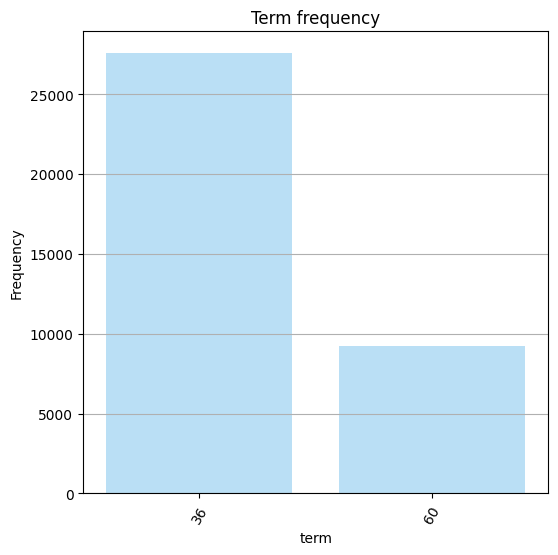

In [19]:
disp_countplot('term', 'Term frequency', fig_size=fig_xsmall_size)

### Plotting Grade frequency

grade
B    11149
A     9518
C     7474
D     4852
E     2574
F      939
G      294
Name: count, dtype: int64


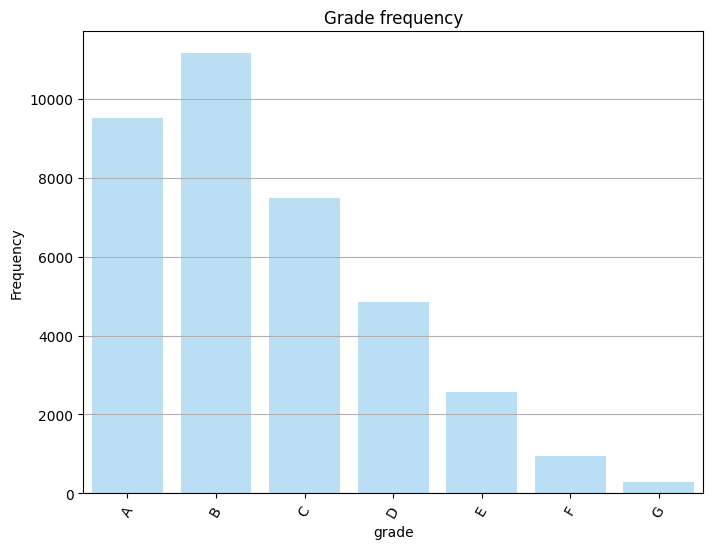

In [20]:
disp_countplot('grade', 'Grade frequency', _order=sorted(df['grade'].unique()))

### Plotting Sub Grade frequency

sub_grade
A4    2762
B3    2710
A5    2602
B5    2517
B4    2345
C1    1961
B2    1898
C2    1862
A3    1702
B1    1679
C3    1421
A2    1411
D2    1227
C4    1140
C5    1090
D3    1065
A1    1041
D1     883
D4     880
D5     797
E1     702
E2     593
E3     498
E4     410
E5     371
F1     297
F2     221
F3     169
F4     143
F5     109
G1      91
G2      76
G4      54
G3      45
G5      28
Name: count, dtype: int64


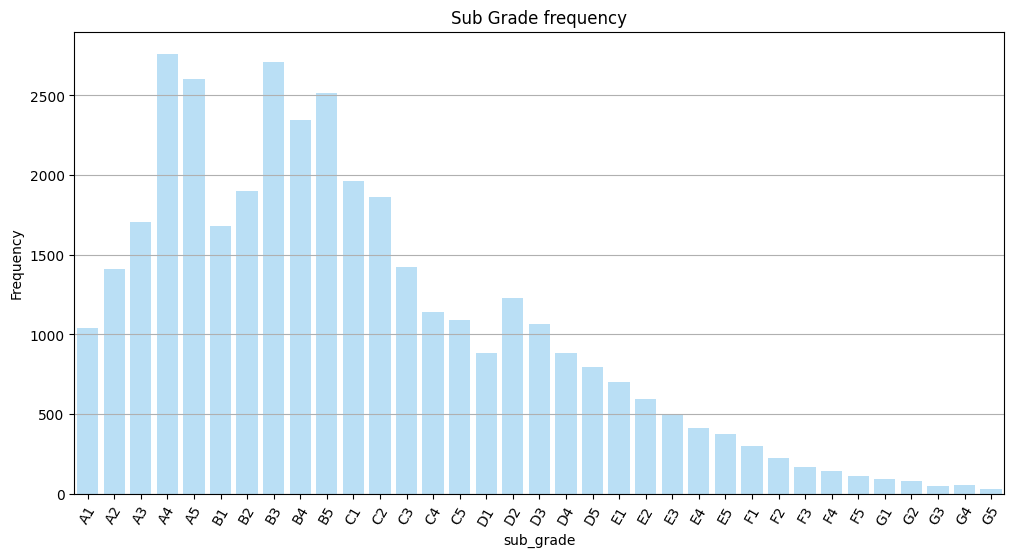

In [21]:
disp_countplot('sub_grade', 'Sub Grade frequency', fig_size=fig_medium_size, _order=sorted(df['sub_grade'].unique()))

In [22]:
### Plotting Home ownership frequency

home_ownership
RENT        17667
MORTGAGE    16334
OWN          2703
OTHER          96
Name: count, dtype: int64


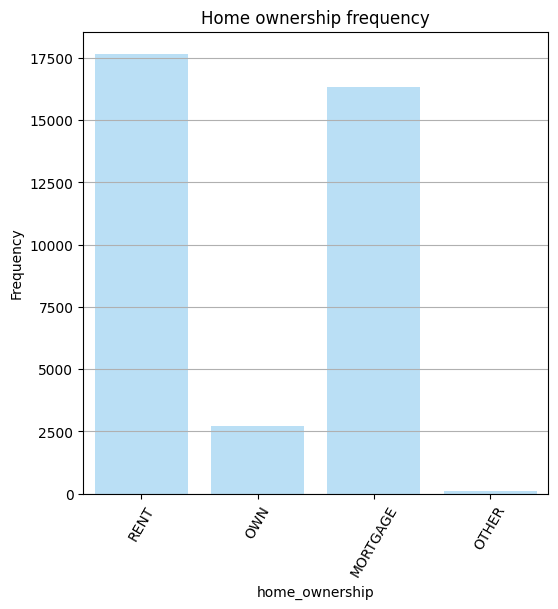

In [23]:
disp_countplot('home_ownership', 'Home ownership frequency', fig_size=fig_xsmall_size)

In [24]:
### Verification Status frequency

verification_status
Not Verified       15554
Verified           11763
Source Verified     9483
Name: count, dtype: int64


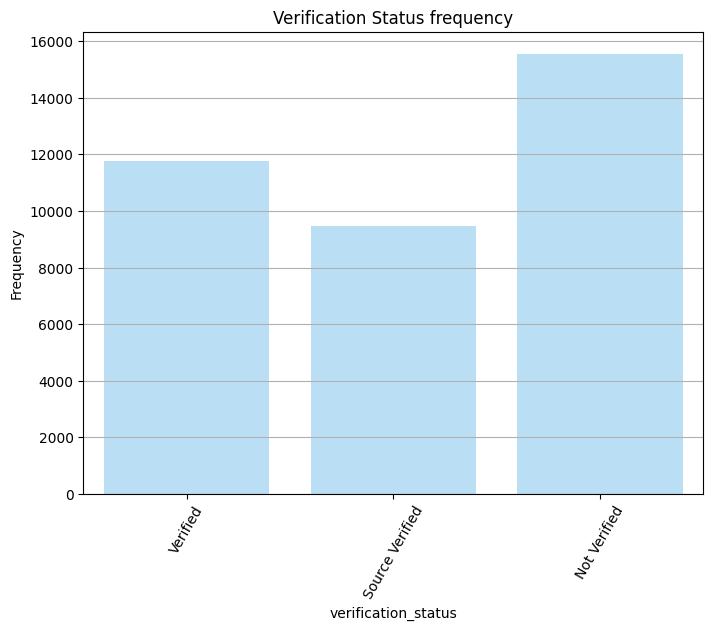

In [25]:
disp_countplot('verification_status', 'Verification Status frequency')

In [26]:
### Plotting the frequency based on the month and year when the loan was funded.

issue_d
Dec-11    1994
Nov-11    1970
Oct-11    1862
Sep-11    1837
Aug-11    1751
Jun-11    1674
Jul-11    1672
May-11    1554
Apr-11    1505
Mar-11    1400
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1096
Jul-10    1091
Oct-10    1083
Sep-10    1057
Aug-10    1055
Jun-10     991
May-10     894
Apr-10     806
Mar-10     717
Feb-10     604
Nov-09     601
Dec-09     596
Jan-10     583
Oct-09     544
Sep-09     447
Aug-09     407
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Dec-08     222
Nov-08     183
Apr-08     155
Mar-08     117
Oct-08      96
Jul-08      82
Aug-08      69
May-08      69
Jun-08      66
Sep-08      32
Feb-08       7
Jan-08       6
Dec-07       2
Nov-07       2
Aug-07       2
Oct-07       1
Name: count, dtype: int64


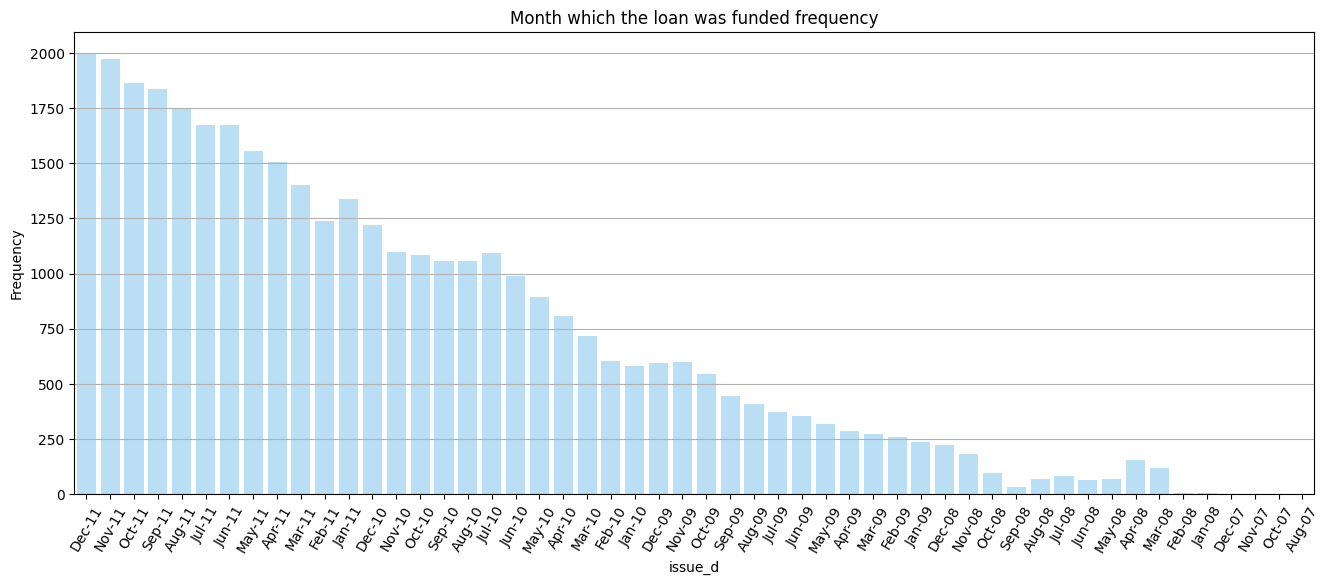

In [27]:
disp_countplot('issue_d', 'Month which the loan was funded frequency', fig_size= fig_large_size)

## Plotting loan status frequency

loan_status
Fully Paid     31534
Charged Off     5266
Name: count, dtype: int64


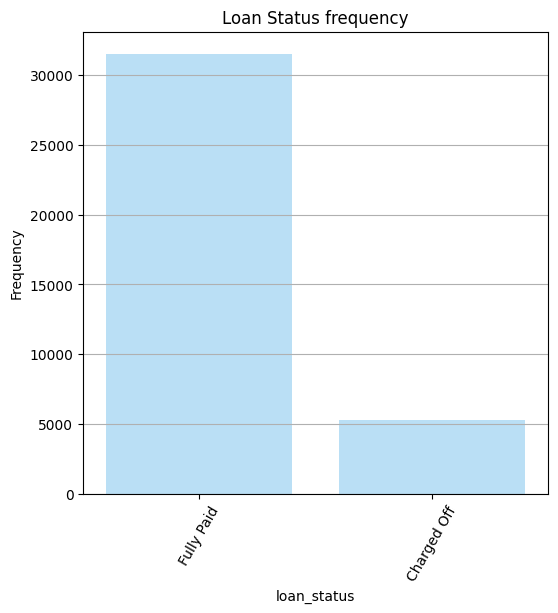

In [28]:
disp_countplot('loan_status', 'Loan Status frequency', fig_size=fig_xsmall_size)

## Plotting 'purpose' wise frequency.

purpose
debt_consolidation    17373
credit_card            4799
other                  3595
home_improvement       2734
major_purchase         2055
small_business         1656
car                    1429
wedding                 893
medical                 645
moving                  541
house                   349
vacation                341
educational             296
renewable_energy         94
Name: count, dtype: int64


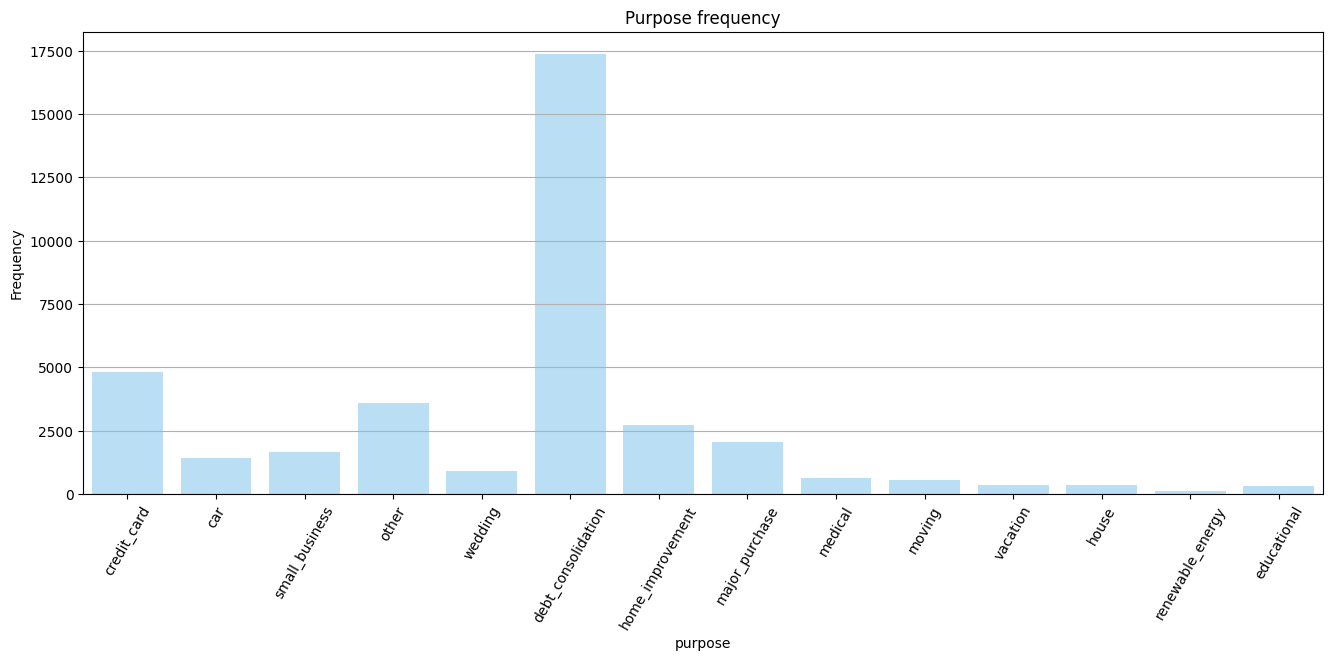

In [29]:
disp_countplot('purpose', 'Purpose frequency', fig_size=fig_large_size)

### Plotting loan amount's distribution

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


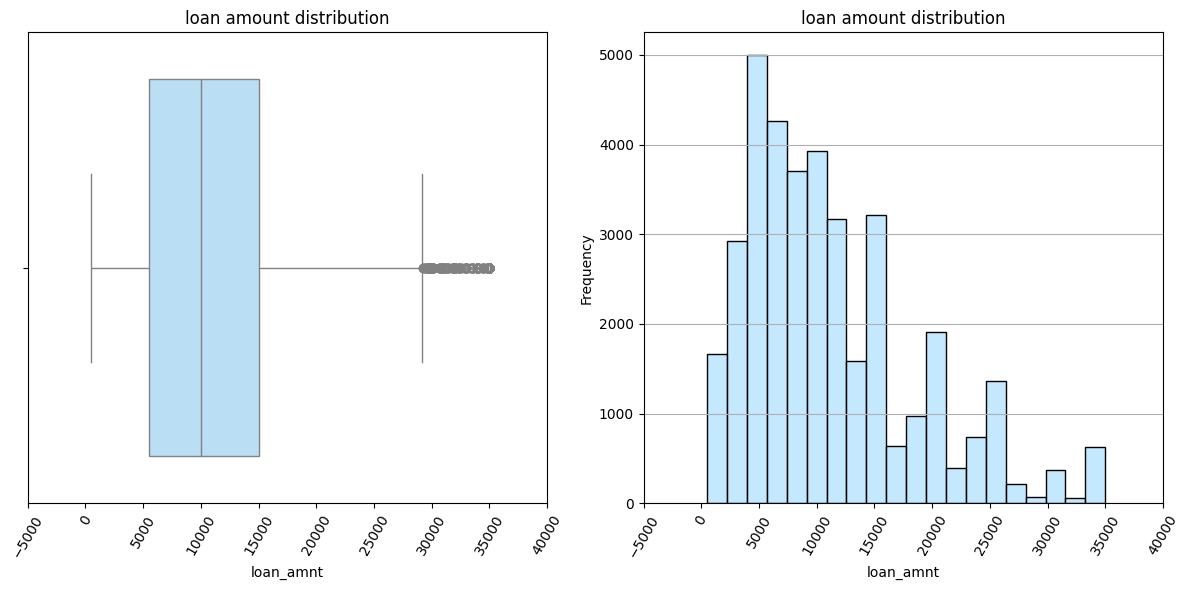

In [30]:
disp_box_and_hist_plots('loan_amnt', 'loan amount distribution') 

### Plotting interest rate distribution

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64


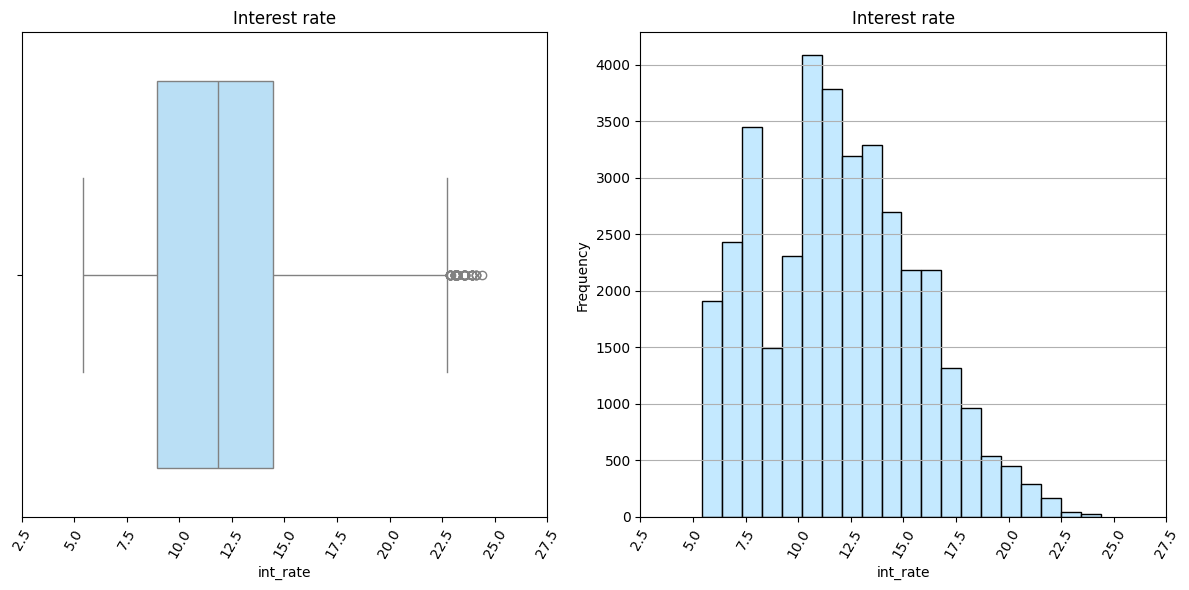

In [31]:
disp_box_and_hist_plots('int_rate', 'Interest rate') 

### Plotting Installment amount

count    36800.000000
mean       324.906537
std        208.891979
min         16.080000
25%        167.730000
50%        280.110000
75%        429.365000
max       1305.190000
Name: installment, dtype: float64


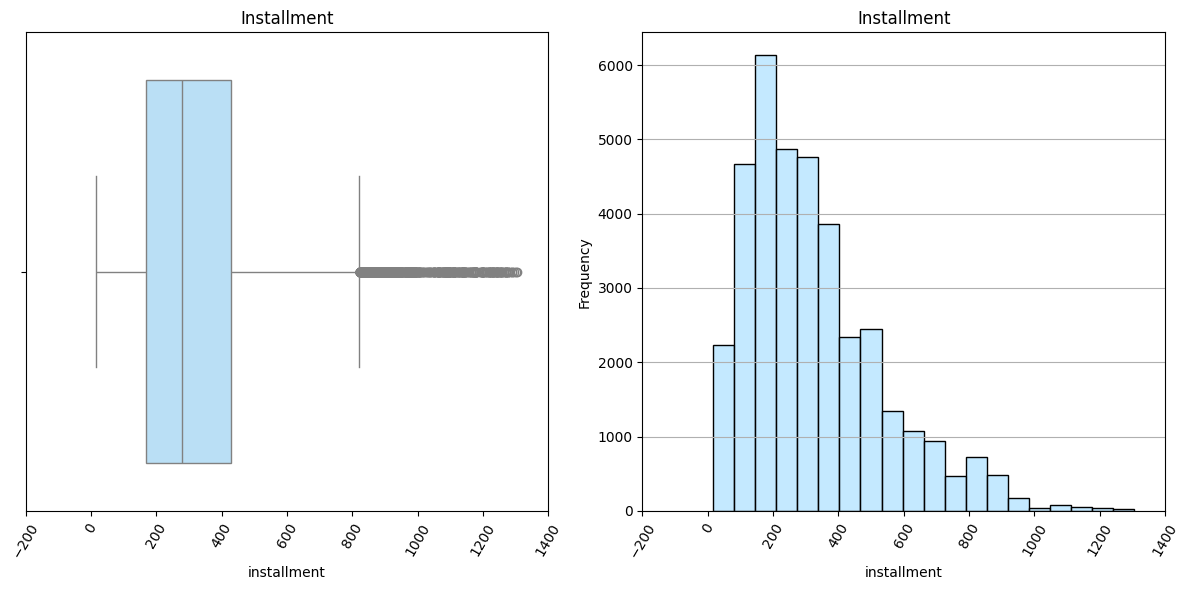

In [32]:
disp_box_and_hist_plots('installment', 'Installment') 

### Plotting employment length

count    36800.000000
mean         5.081929
std          3.398983
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


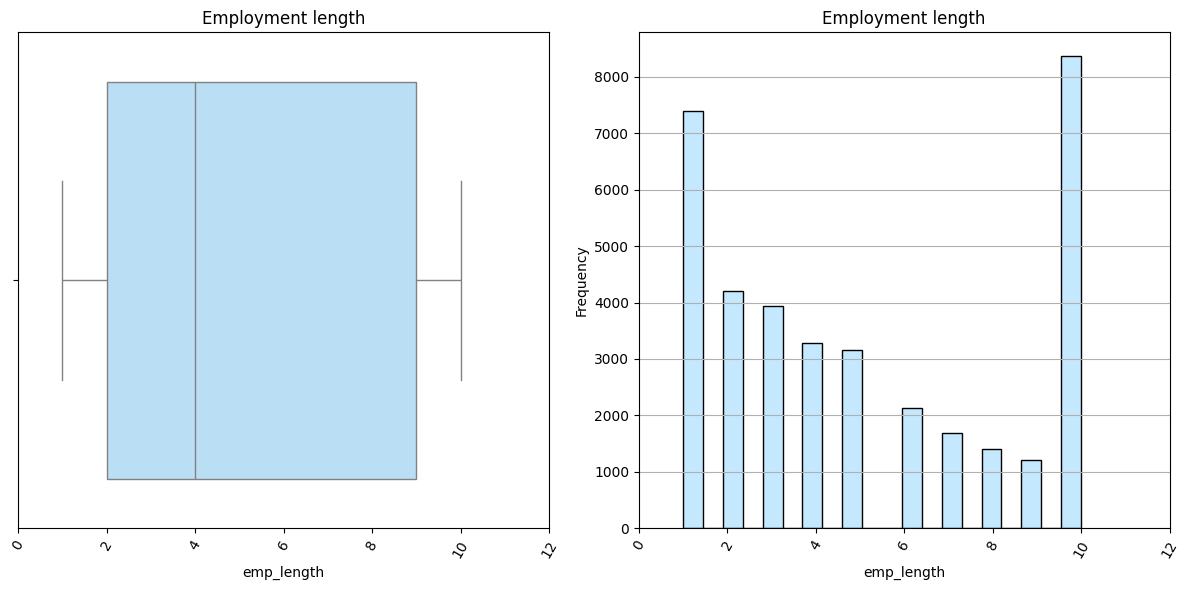

In [33]:
disp_box_and_hist_plots('emp_length', 'Employment length') 

In [34]:
### Plotting annual income distribution

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


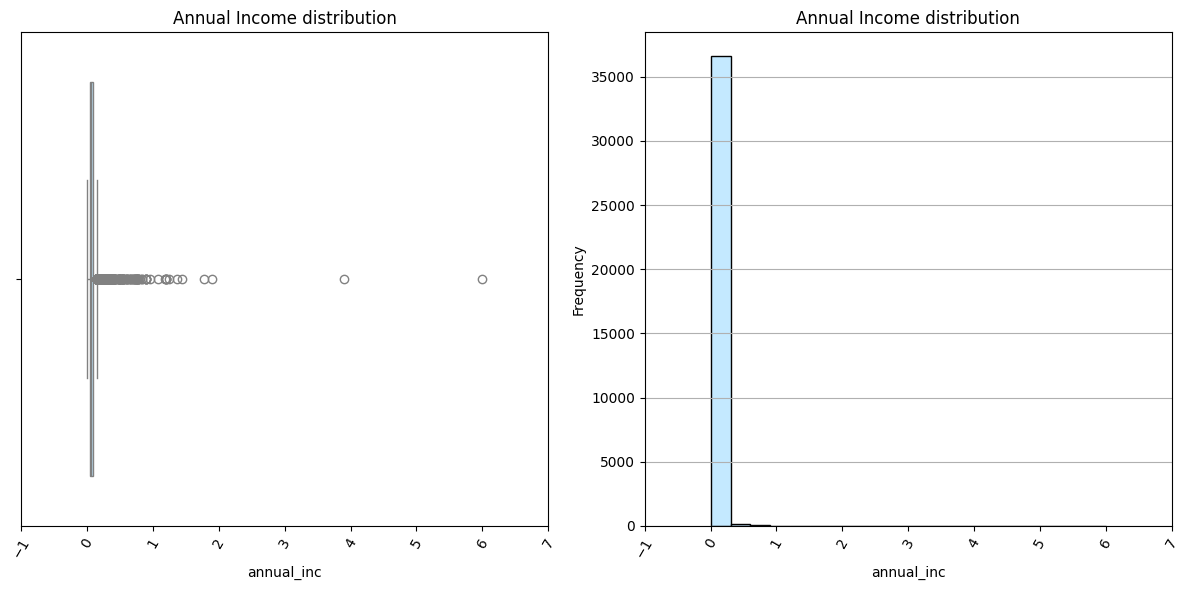

In [35]:
disp_box_and_hist_plots('annual_inc', 'Annual Income distribution') 

### Annual income has clear outliers. So, removing outliers using IQR

In [36]:
## drop outliers
q25 = df['annual_inc'].quantile(0.25)
q75 = df['annual_inc'].quantile(0.75)

df = df[(df['annual_inc'] >= q25) & (df['annual_inc'] <= q75)]

### Plotting annual income distribution after removing outliers 

count    18421.000000
mean     59782.817573
std      11534.637132
min      41136.000000
25%      50000.000000
50%      60000.000000
75%      70000.000000
max      83000.000000
Name: annual_inc, dtype: float64


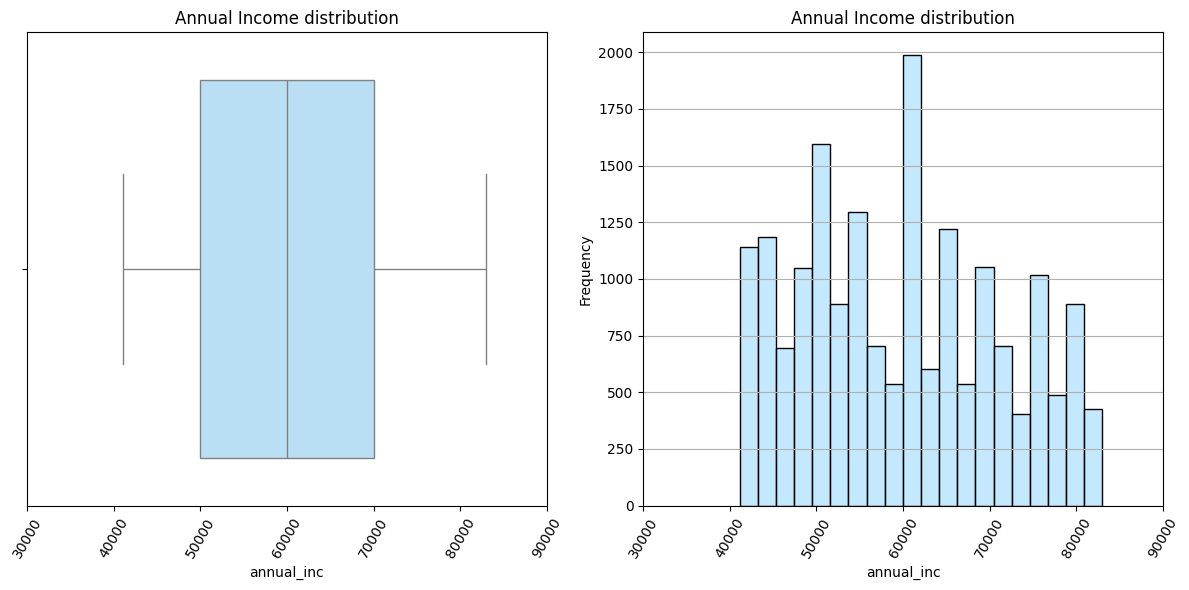

In [37]:
## Check annual income after removing outliers

disp_box_and_hist_plots('annual_inc', 'Annual Income distribution', _df=df) 

In [38]:
### Plotting dti distribution after removing outliers 

count    18421.000000
mean        13.787495
std          6.558938
min          0.000000
25%          8.880000
50%         14.000000
75%         18.980000
max         29.990000
Name: dti, dtype: float64


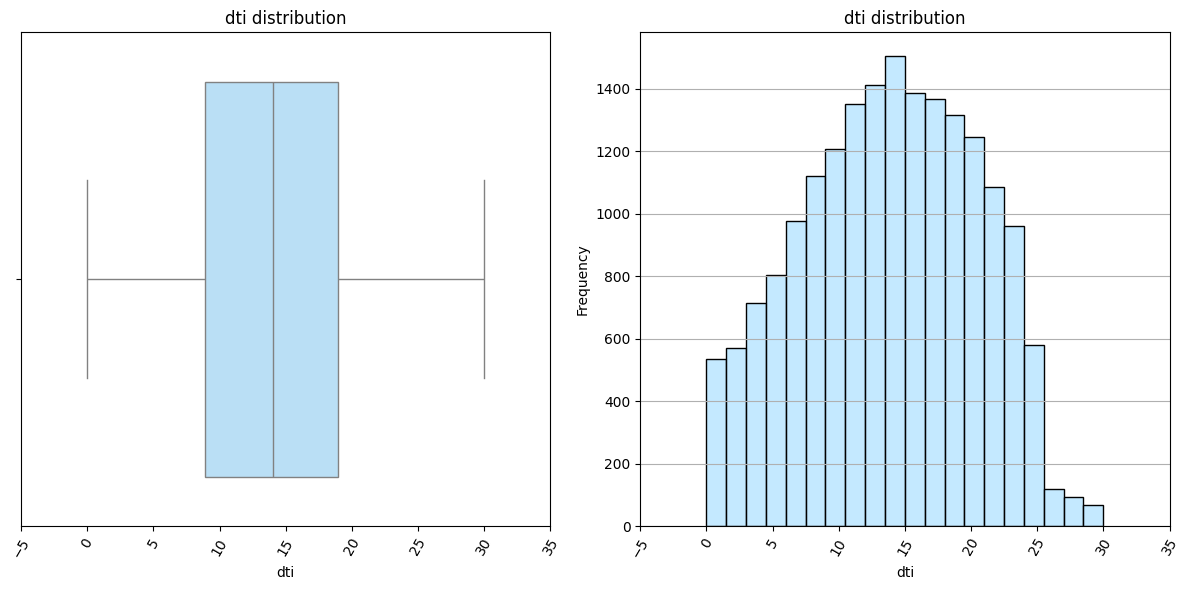

In [39]:
disp_box_and_hist_plots('dti', 'dti distribution', _df=df) 

In [40]:
### Plotting delinq_2yrs

count    18421.000000
mean         0.142012
std          0.491099
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


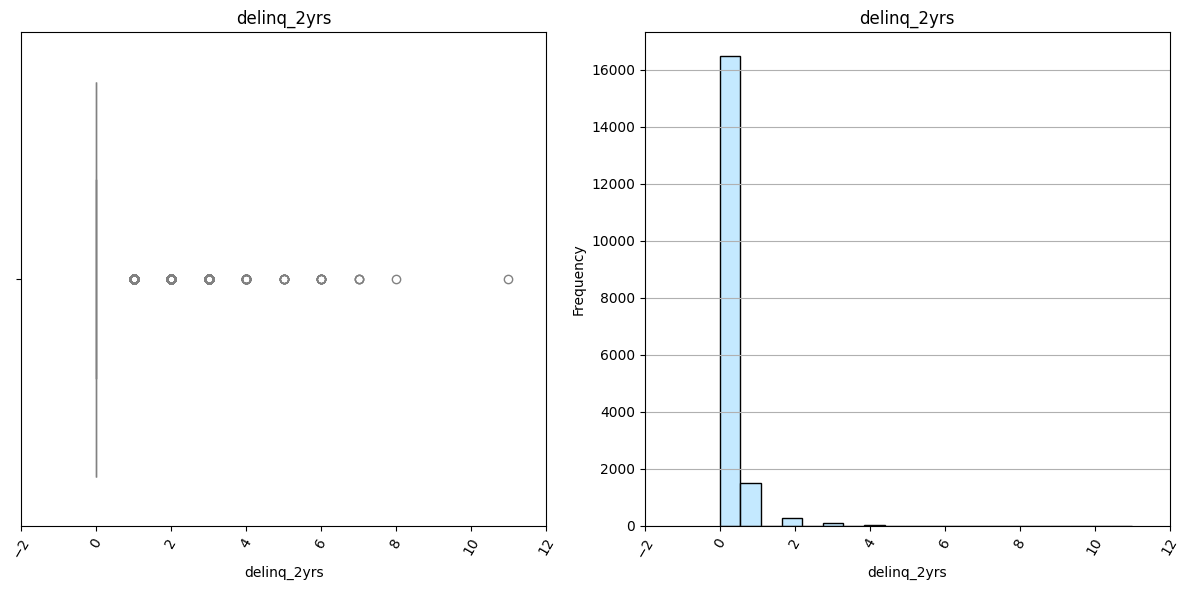

In [41]:
disp_box_and_hist_plots('delinq_2yrs', 'delinq_2yrs', _df=df) 

In [42]:
### Plotting inq_last_6mths

count    18421.000000
mean         0.869171
std          1.061995
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


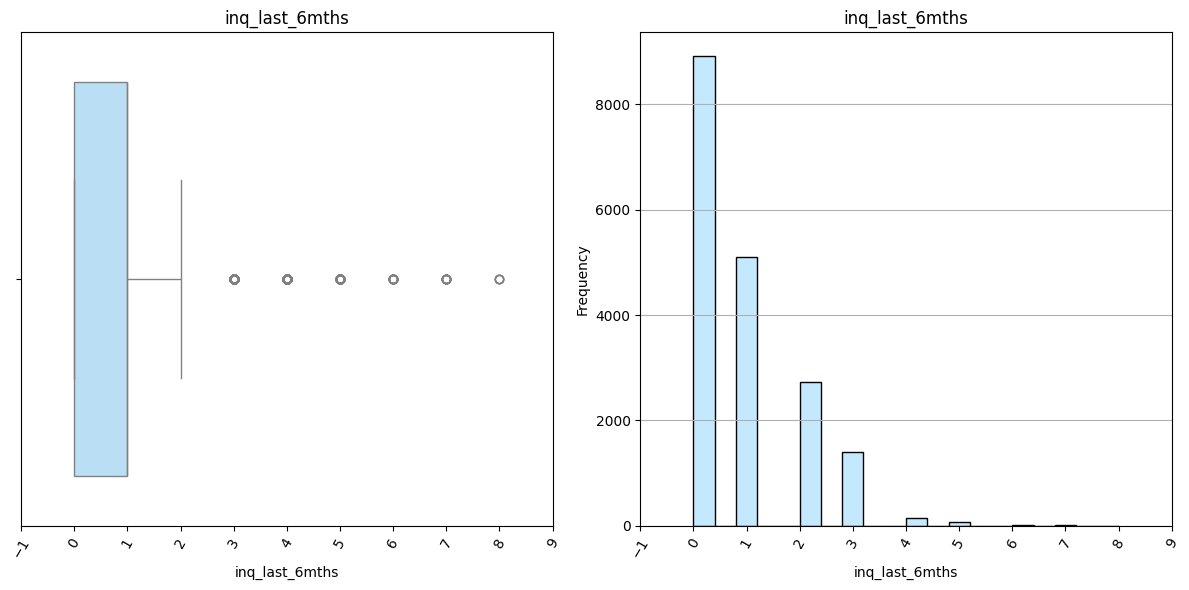

In [43]:
disp_box_and_hist_plots('inq_last_6mths', 'inq_last_6mths', _df=df) 

In [44]:
## some helper functions.

def loan_amnt_segments(loan_amt):
    if loan_amt <= 12000:
        return 'Small'
    elif loan_amt <= 24000:
        return 'Medium'
    else:
        return "Large"

def int_rate_segments(int_rate):
    if int_rate <= 7.5:
        return 'Low'
    elif int_rate <= 15:
        return 'Medium'
    else:
        return "High"

def installment_segments(amt):
    if amt <= 200:
        return 'Low'
    elif amt <= 800:
        return 'Medium'
    else:
        return "High"

#a function to create segments based on employment length
def emp_length_segments(emp_length) :
        if emp_length <= 2 :
            return 'Junior'
        elif emp_length <= 8 :
            return 'Middle'
        else:
            return 'Senior'

def annual_inc_segments(amt):
    if amt <= 50000:
        return 'Low'
    elif amt <= 75000:
        return 'Medium'
    else:
        return "High"

def dti_segments(dti):
    if dti <= 10:
        return 'Low'
    elif dti <= 20:
        return 'Medium'
    else:
        return "High"

#returns full year based on 2 digit years
#As the data is till 2011, if a year has less than or equal to 11 it should be 2000 + 2 digit year 
#otherwise 1900 + 2 digits year
def parse_year(year):
    if year <= 11:
        return 2000 + year
    else:
        return 1900 + year

def get_decade(yr):
    start = (yr // 10) * 10
    end = start + 9 
    return f"{start}-{end}"

def get_century(yr):
    if yr <= 1999:
       return "Before 2000"
    else:
       return "After 2000"
        


### Creating some derived columns by creating segments

In [45]:
df = df.copy()
# creating segments for loan amounts
df.loc[:,'loan_amnt_categories'] = df['loan_amnt'].apply(lambda x: loan_amnt_segments(x))

# creating segments for annual income
df.loc[:,'int_rate_categories']  = df['int_rate'].apply(lambda x: int_rate_segments(x))

# creating segments for installment amount
df.loc[:,'installment_categories'] =  df['installment'].apply(lambda x: installment_segments(x))

# creating segments for installment amount
df.loc[:,'emp_length_categories'] =  df['emp_length'].apply(lambda x: emp_length_segments(x))

df.loc[:,'annual_inc_categories']  =  df['annual_inc'].apply(lambda x: annual_inc_segments(x))

# creates segments for dti
df.loc[:,'dti_categories'] = df['dti'].apply(lambda x: dti_segments(x))

# Adding new column for derived metrics analysis
df.loc[:,'earliest_cr_line_yr'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.strftime('%y').apply(lambda x: parse_year(int(x)))

df.loc[:,'earliest_cr_line_yr_categories']  = df['earliest_cr_line_yr'].apply(lambda x: get_century(x))

## Segmented Univariate analysis

### Segmented univariate analysis using Loan amount categories
` segments are`
- Small : <= 12000
- Medium : 12000 > and <= 24000
- Large:  24000 > 

loan_amnt_categories
Small     12139
Medium     5248
Large      1034
Name: count, dtype: int64


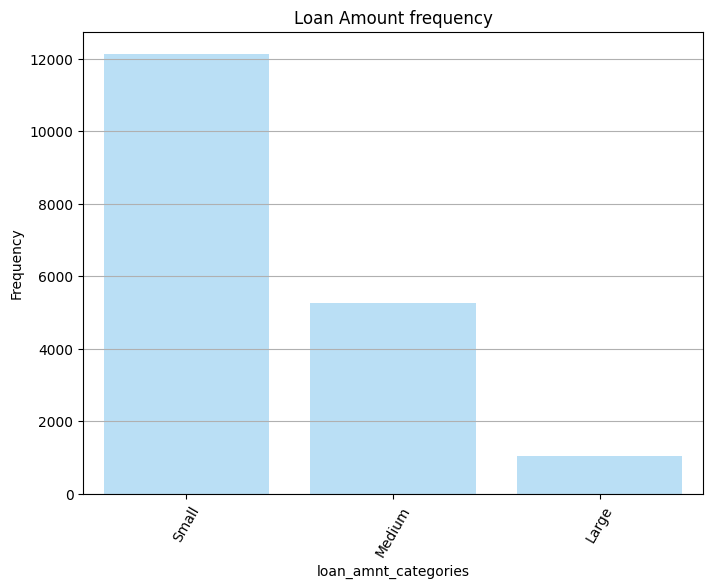

In [46]:
disp_countplot('loan_amnt_categories', 'Loan Amount frequency', _df=df)

### Segmented univariate analysis using interest rate categories
` segments are`
- Low: <= 7.5
- Medium <= 15
- High >15

int_rate_categories
Medium    11893
High       3861
Low        2667
Name: count, dtype: int64


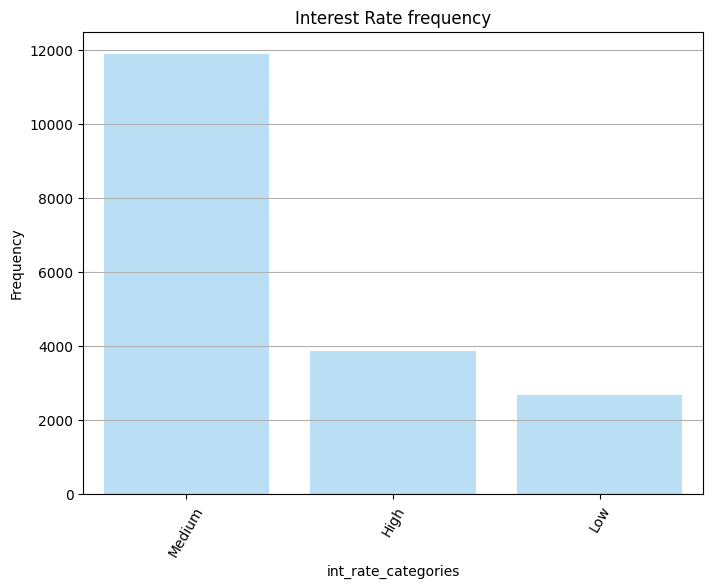

In [47]:
disp_countplot('int_rate_categories', 'Interest Rate frequency', _df=df)

### Segmented univariate analysis using installment categories
` segments are`
- Low: <= 200
- Medium <= 800
- High >800

installment_categories
Medium    12321
Low        5657
High        443
Name: count, dtype: int64


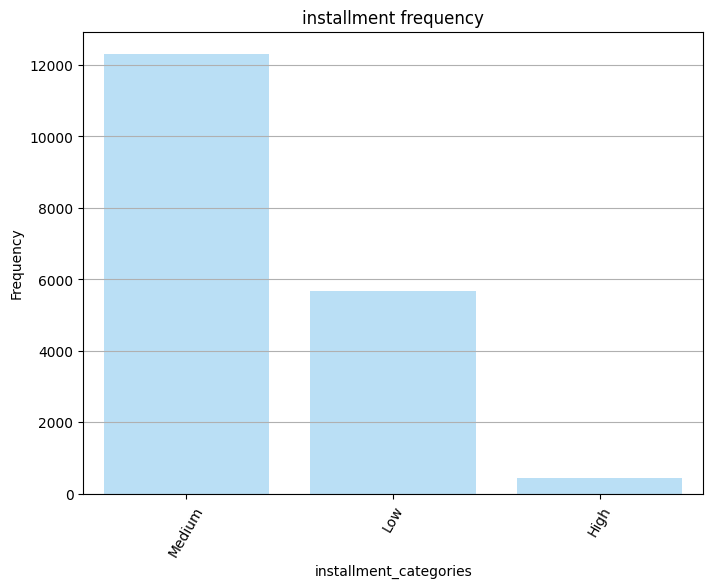

In [48]:
disp_countplot('installment_categories', 'installment frequency', _df=df)

### Segmented univariate analysis using Employment length categories
` segments are`
- Junior: <= 2
- Middle <= 8
- Senio r >8

emp_length_categories
Middle    8048
Junior    5280
Senior    5093
Name: count, dtype: int64


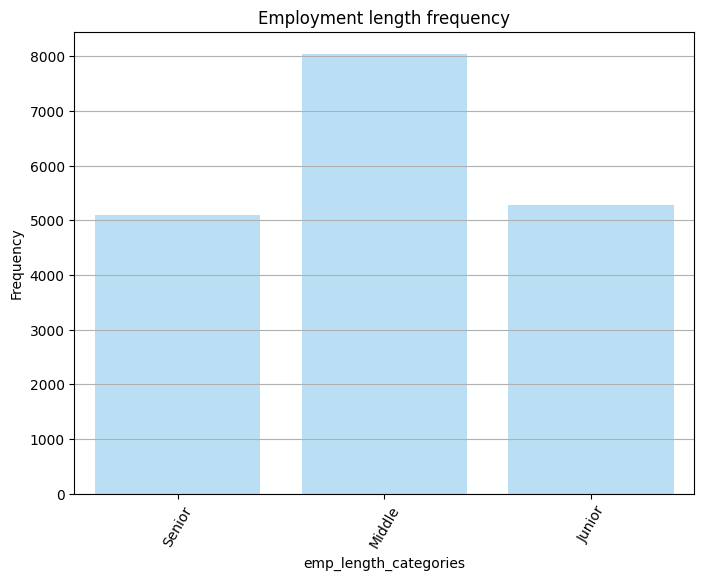

In [49]:
disp_countplot('emp_length_categories', 'Employment length frequency', _df=df)

### Segmented univariate analysis using Annual Income categories
` segments are`
- Low: <= 50000
- Medium <= 75000
- High >75000

annual_inc_categories
Medium    11267
Low        5122
High       2032
Name: count, dtype: int64


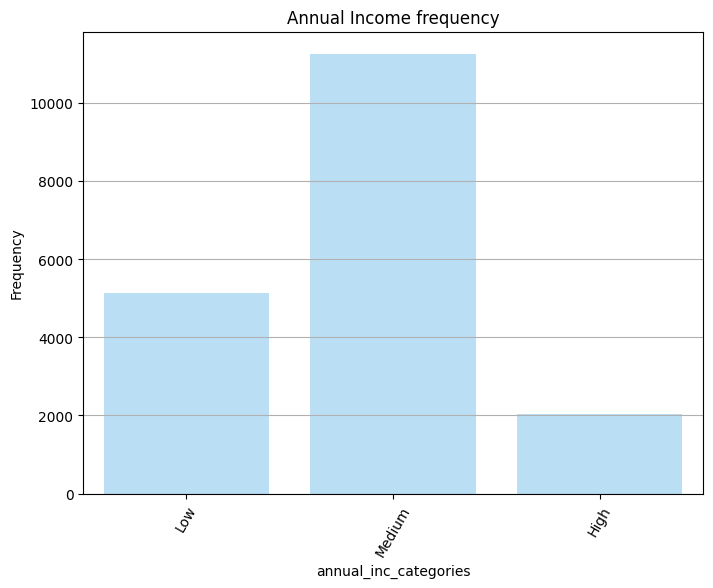

In [50]:
disp_countplot('annual_inc_categories', 'Annual Income frequency', _df=df)

### Segmented univariate analysis using dti categories
` segments are`
- Low: <= 10
- Medium <= 20
- High > 20

dti_categories
Medium    9209
Low       5521
High      3691
Name: count, dtype: int64


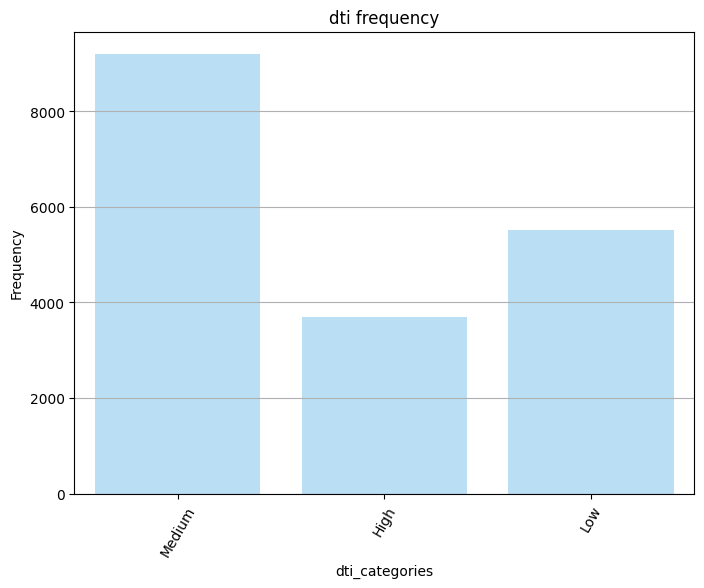

In [51]:
disp_countplot('dti_categories', 'dti frequency', _df=df)

### Univariate analysis using earliest_cr_line_yr which is a derived column

earliest_cr_line_yr
2000    1734
1999    1604
1998    1448
2001    1311
1997    1261
1996    1104
1995    1024
2002     980
1994     912
2003     884
2004     761
1993     686
2005     580
1990     480
1992     466
1991     410
2006     368
1989     355
1988     298
1987     264
1986     223
2007     193
1985     189
1984     151
1983     135
1982      85
1979      65
1981      63
1978      60
1980      55
1976      40
2008      40
1977      39
1975      33
1973      23
1970      21
1974      17
1972      12
1971      11
1969      11
1967       8
1968       7
1965       2
1962       2
1966       2
1964       2
1963       1
1950       1
Name: count, dtype: int64


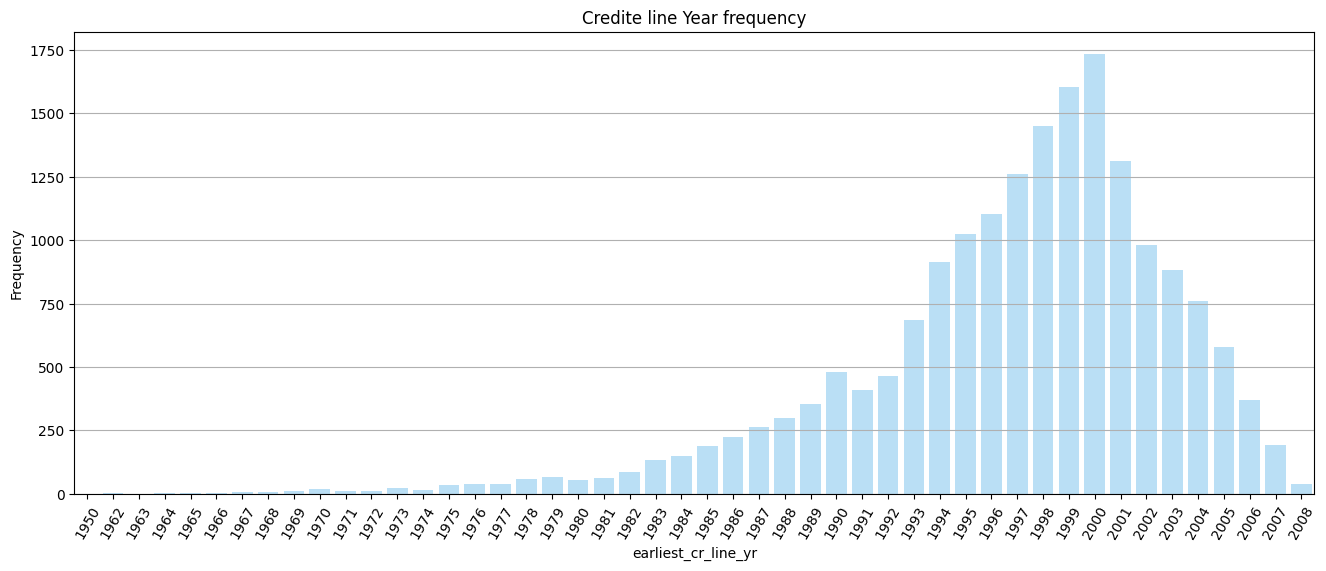

In [52]:
disp_countplot('earliest_cr_line_yr', 'Credite line Year frequency', fig_size=fig_large_size, _df=df)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18421 entries, 3 to 39573
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       18421 non-null  int64  
 1   term                            18421 non-null  int32  
 2   int_rate                        18421 non-null  float64
 3   installment                     18421 non-null  float64
 4   grade                           18421 non-null  object 
 5   sub_grade                       18421 non-null  object 
 6   emp_length                      18421 non-null  int32  
 7   home_ownership                  18421 non-null  object 
 8   annual_inc                      18421 non-null  float64
 9   verification_status             18421 non-null  object 
 10  issue_d                         18421 non-null  object 
 11  loan_status                     18421 non-null  object 
 12  purpose                         18421

In [54]:
# A helper function for displaying barplot

def disp_barplot(x_col, y_col, fig_size=(8,6), _df=df):
    sns.set_style("ticks")
    sns.set_context("notebook")
    plt.figure(figsize=fig_size)
    sns.barplot(x=x_col, y=y_col, data=_df, hue='loan_status', palette=palette)
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

# A helper function to display sub plots
def disp_sub_plots(x_col, y_cols, _df=df, _order=None):
    ncols = 2
    nrows = math.ceil(len(y_cols) / ncols)  # calculate the number of rows needed
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6*nrows))  # adjust the figure size as needed

    for i, num_col in enumerate(y_cols):
        row = i // ncols  # calculate the current row
        col = i % ncols  # calculate the current column
        _ax = axs[row, col]
        sns.barplot(x=_df[x_col], y=_df[num_col], ax=_ax, color="#B0E2FF", order=_order)
        _ax.set_title(f'{num_col} vs {x_col}')
        _ax.set_xticks(_ax.get_xticks())
        _ax.set_xticklabels(_ax.get_xticklabels(), rotation=60)
        _ax.grid(axis='y')
        
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

### Bivariate analysis of grade vs loan amount, term, interest rate, installment, annuall income and dti

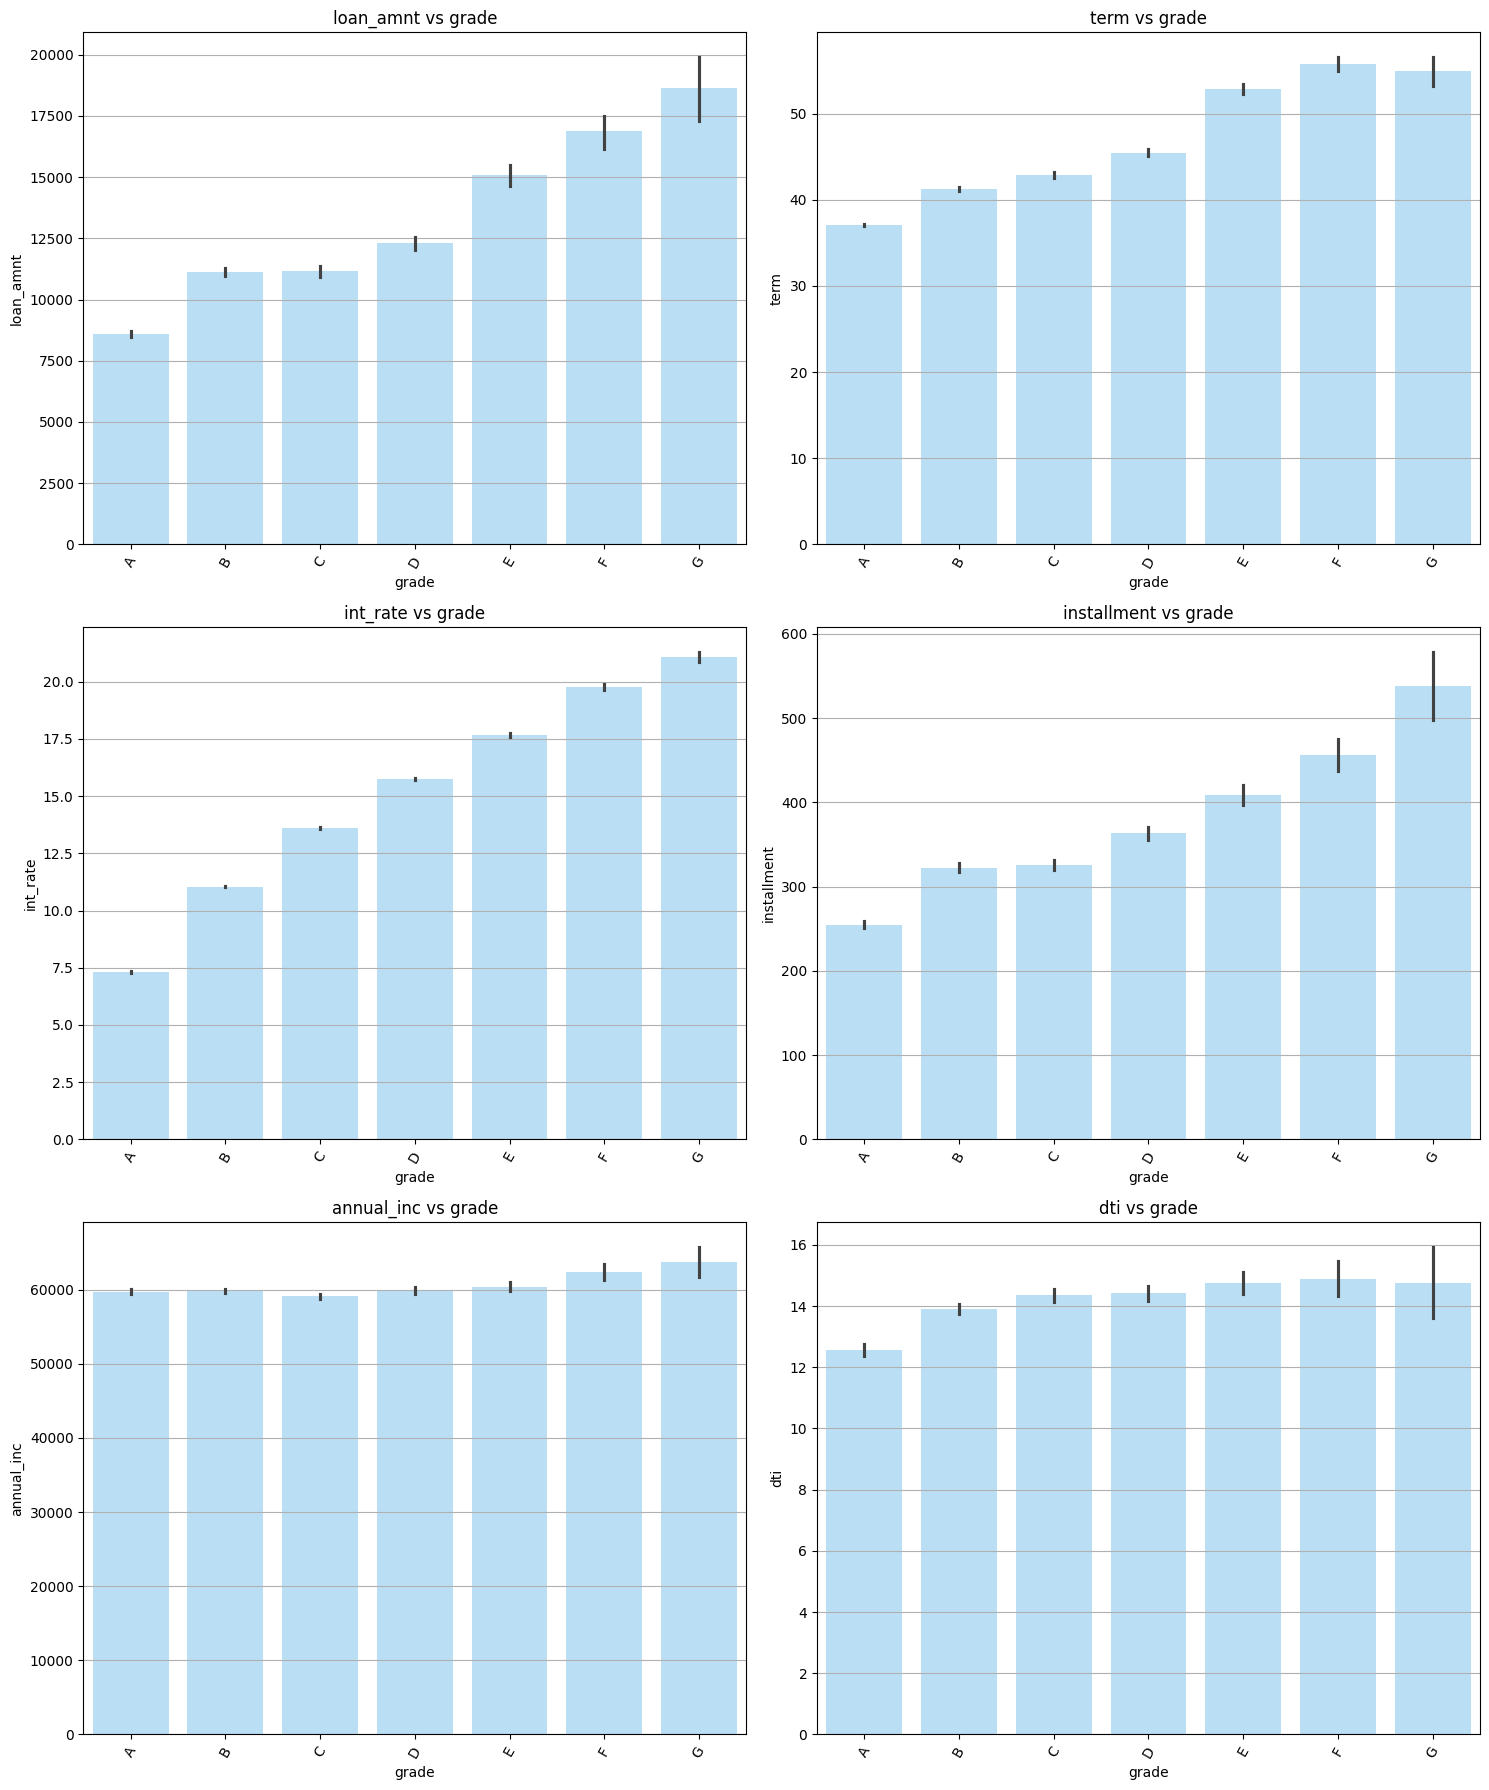

In [55]:
disp_sub_plots('grade', ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti'], _order=sorted(df['grade'].unique()))

### Bivariate analysis of sub_grade vs loan amount, term, interest rate, installment, annuall income and dti

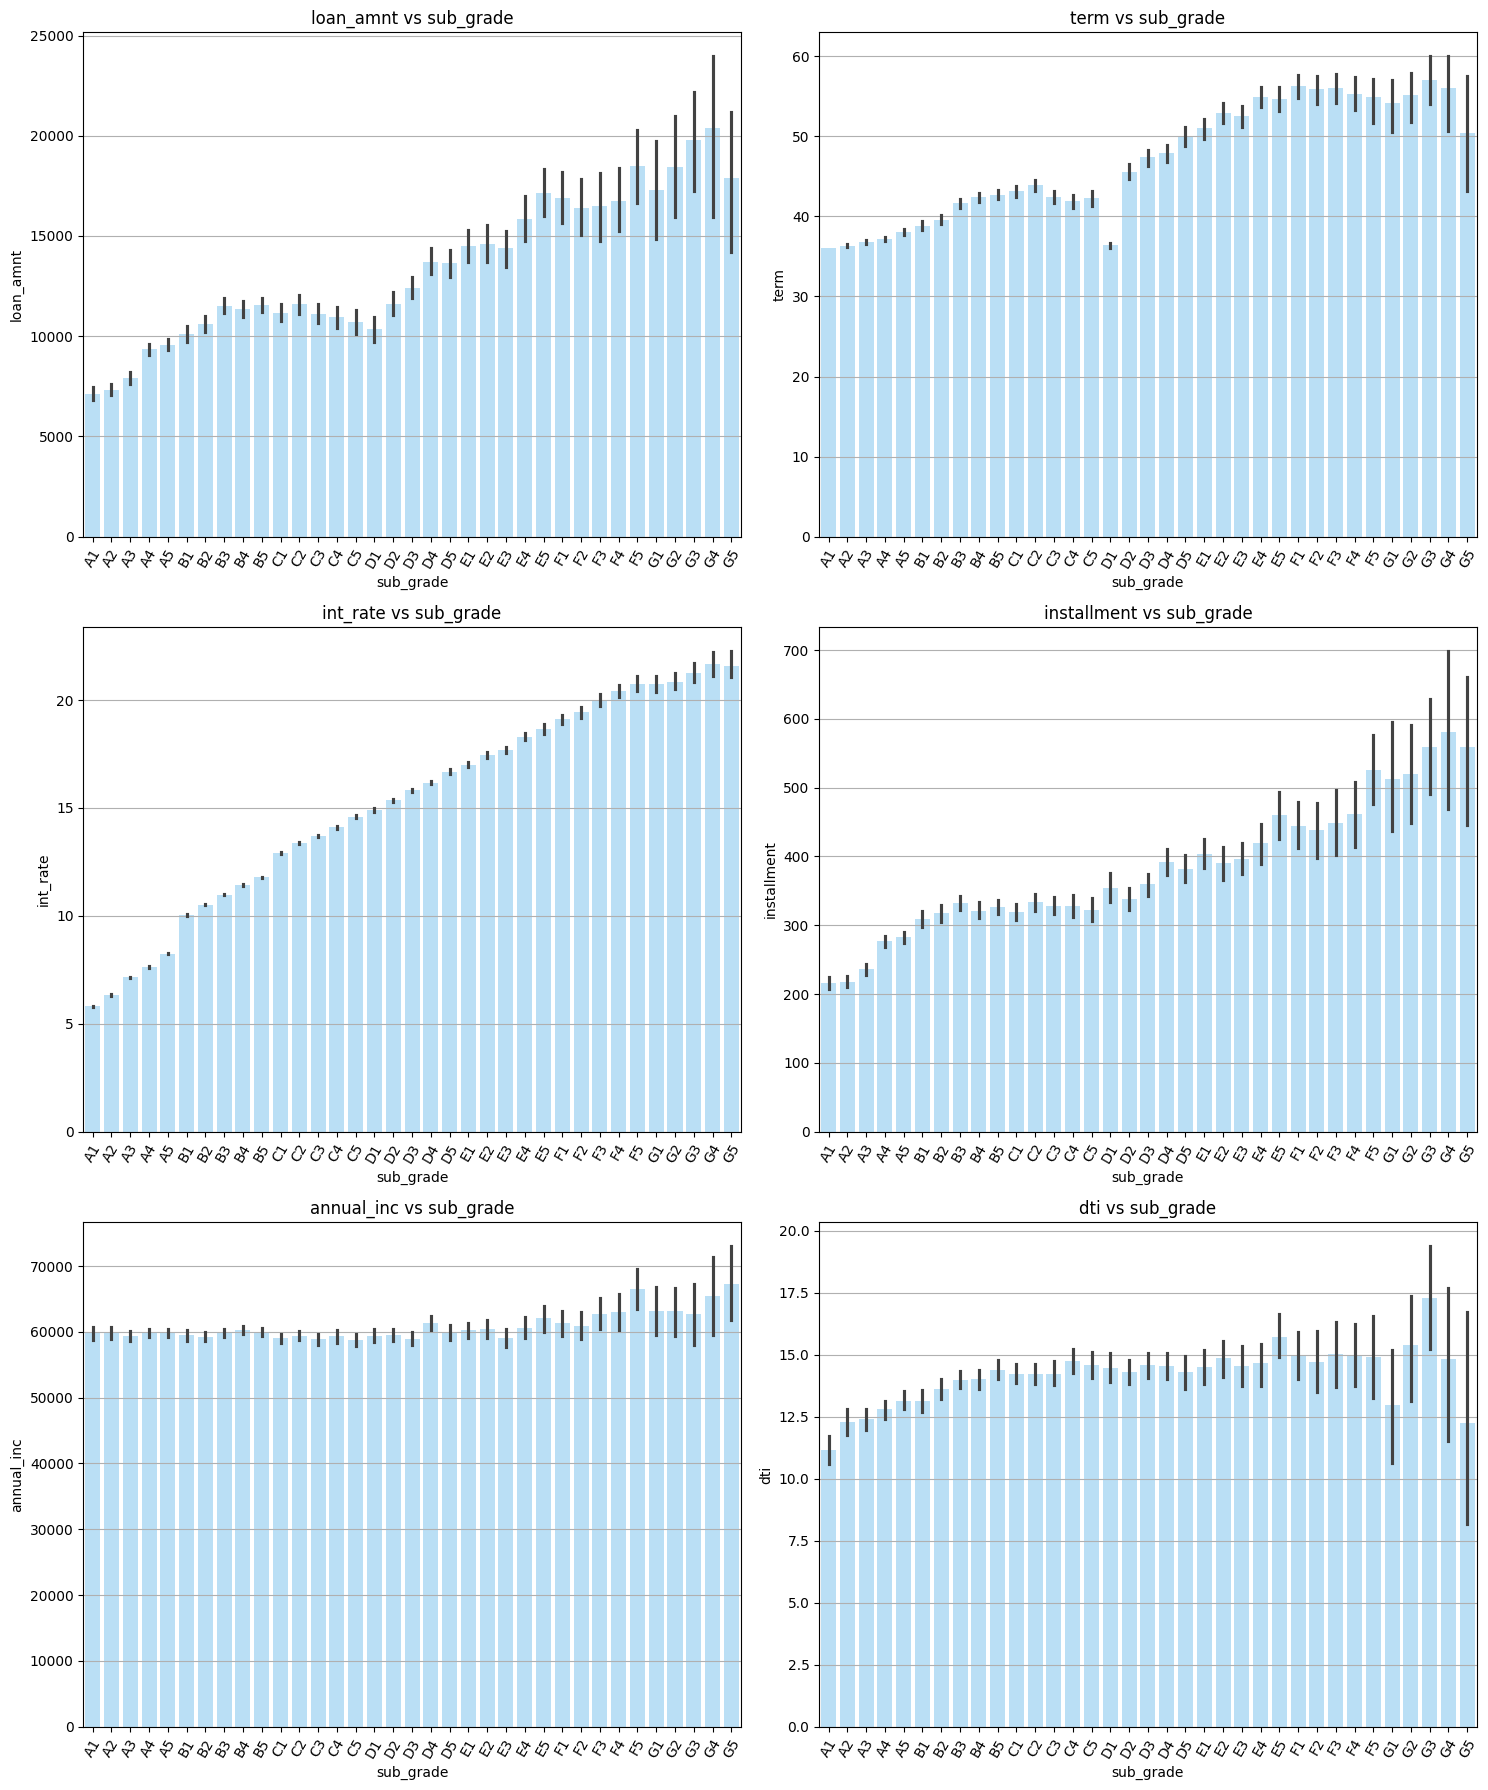

In [56]:
disp_sub_plots('sub_grade', ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti'], _order=sorted(df['sub_grade'].unique()))

In [57]:
### Bivariate analysis of home_ownership vs loan amount, term, interest rate, installment, annuall income and dti

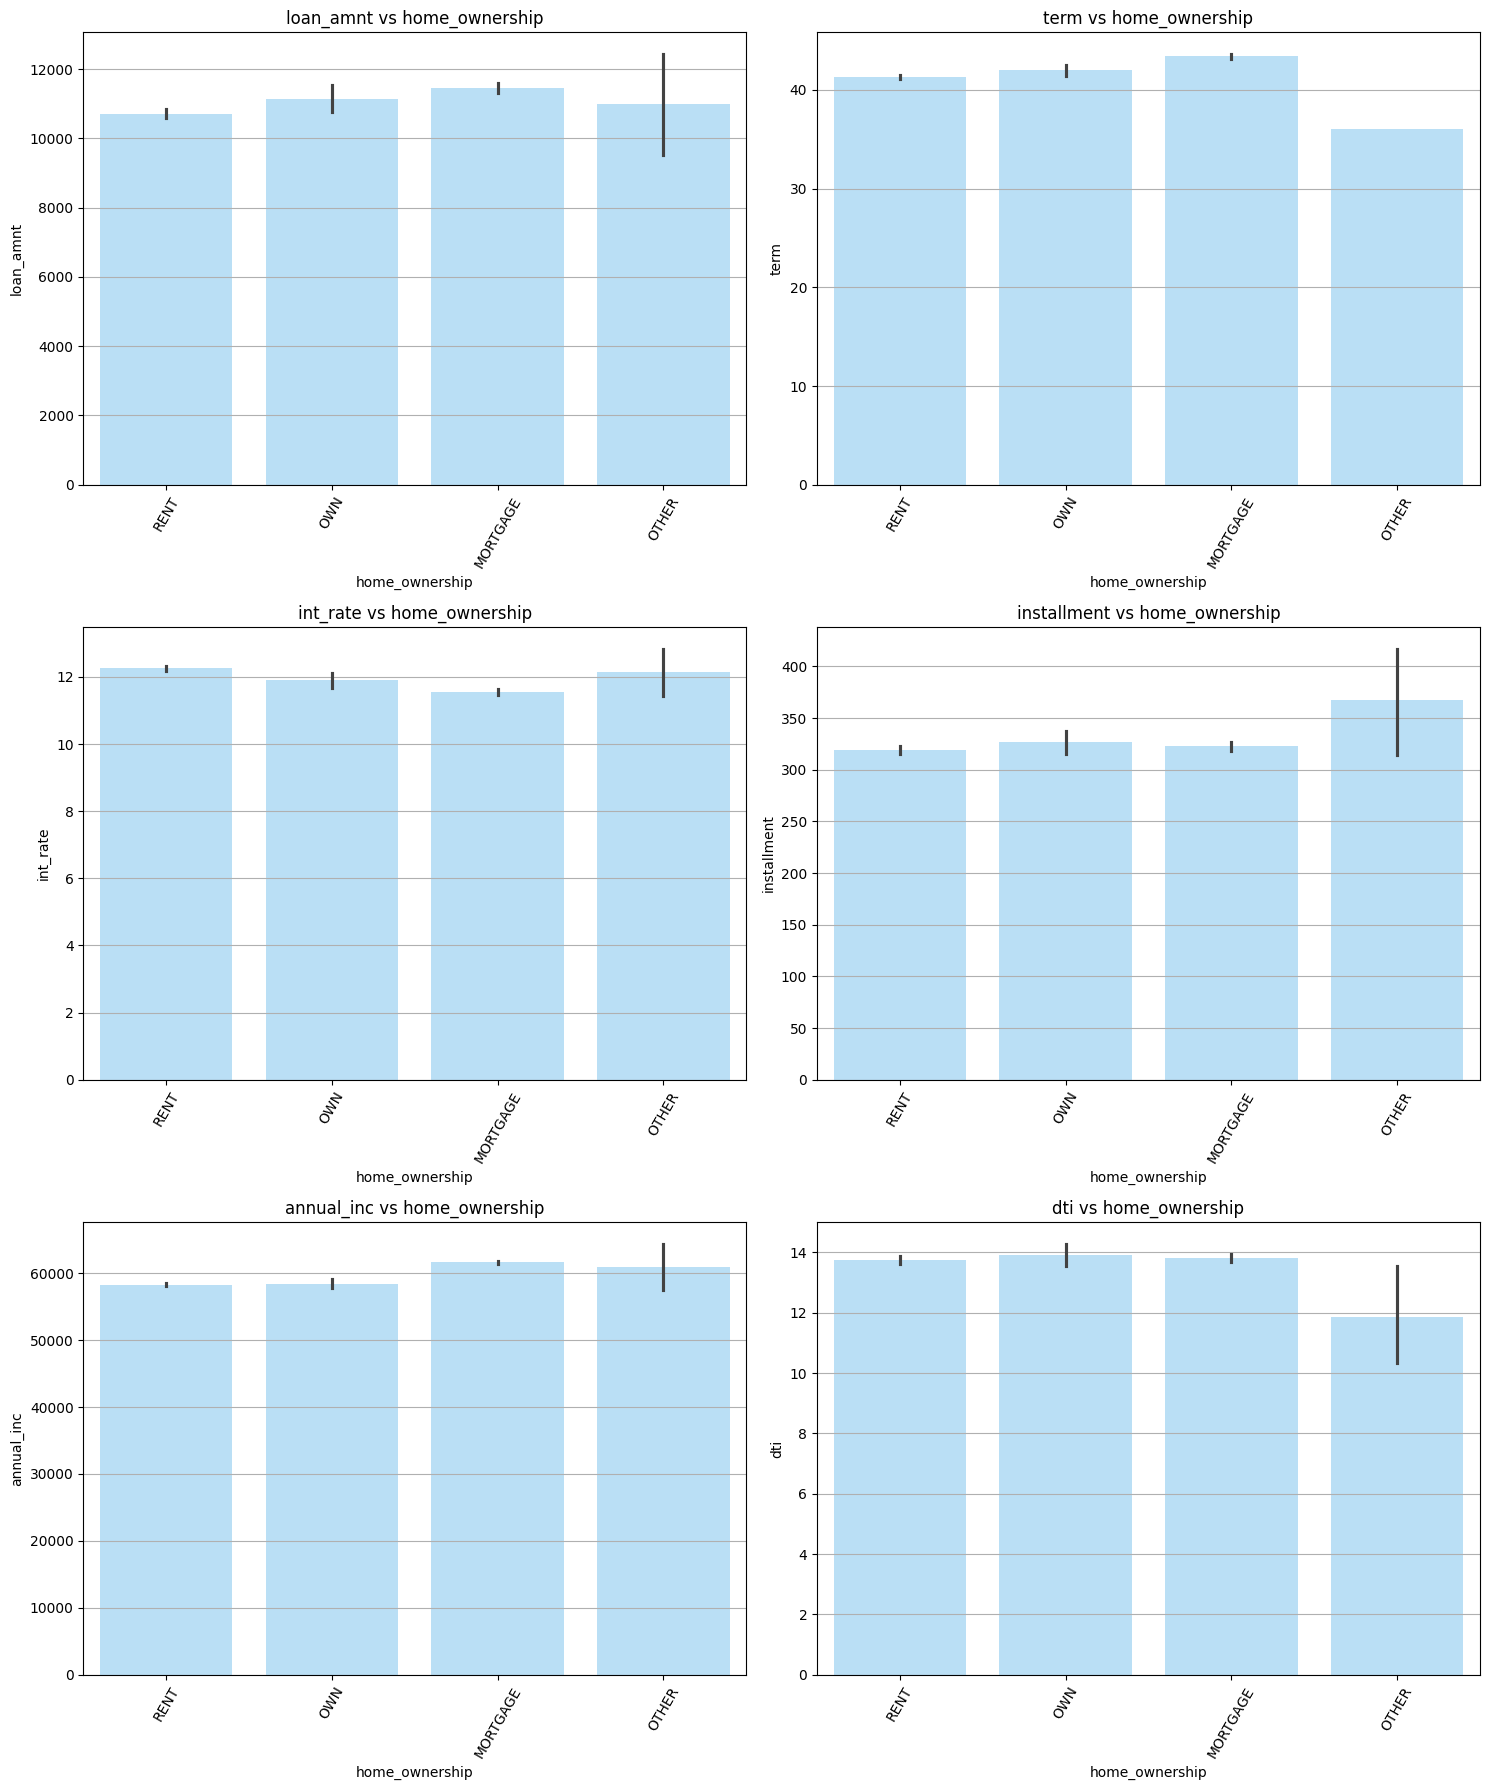

In [58]:
disp_sub_plots('home_ownership', ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti'])

### Bivariate analysis of loan status vs loan amount, term, interest rate, installment, annuall income and dti

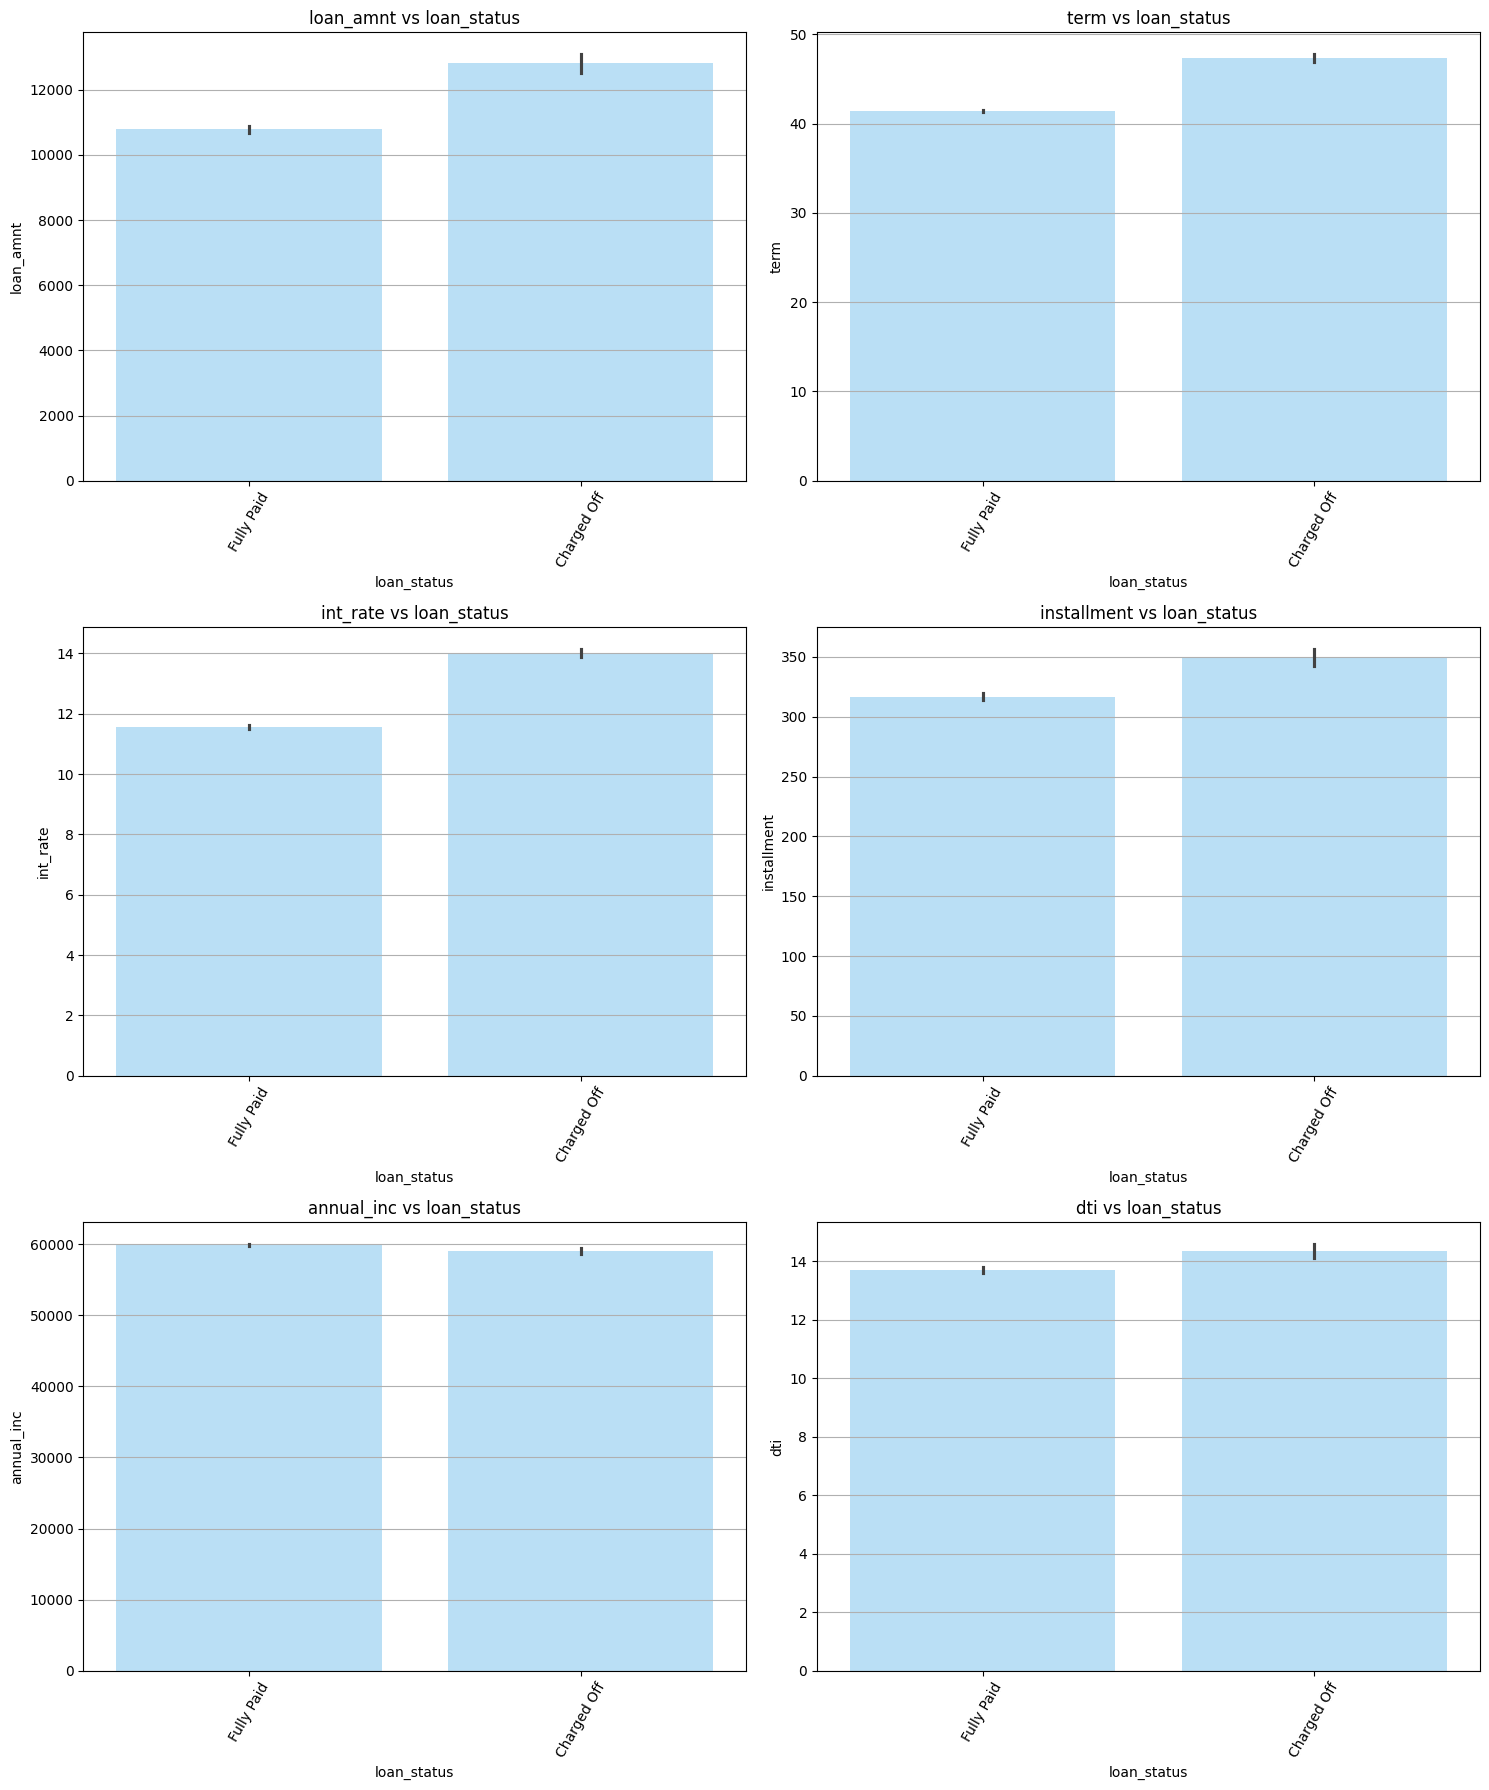

In [59]:
disp_sub_plots('loan_status', ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti' ])

### Bivariate analysis of purpose vs loan amount, term, interest rate, installment, annuall income and dti

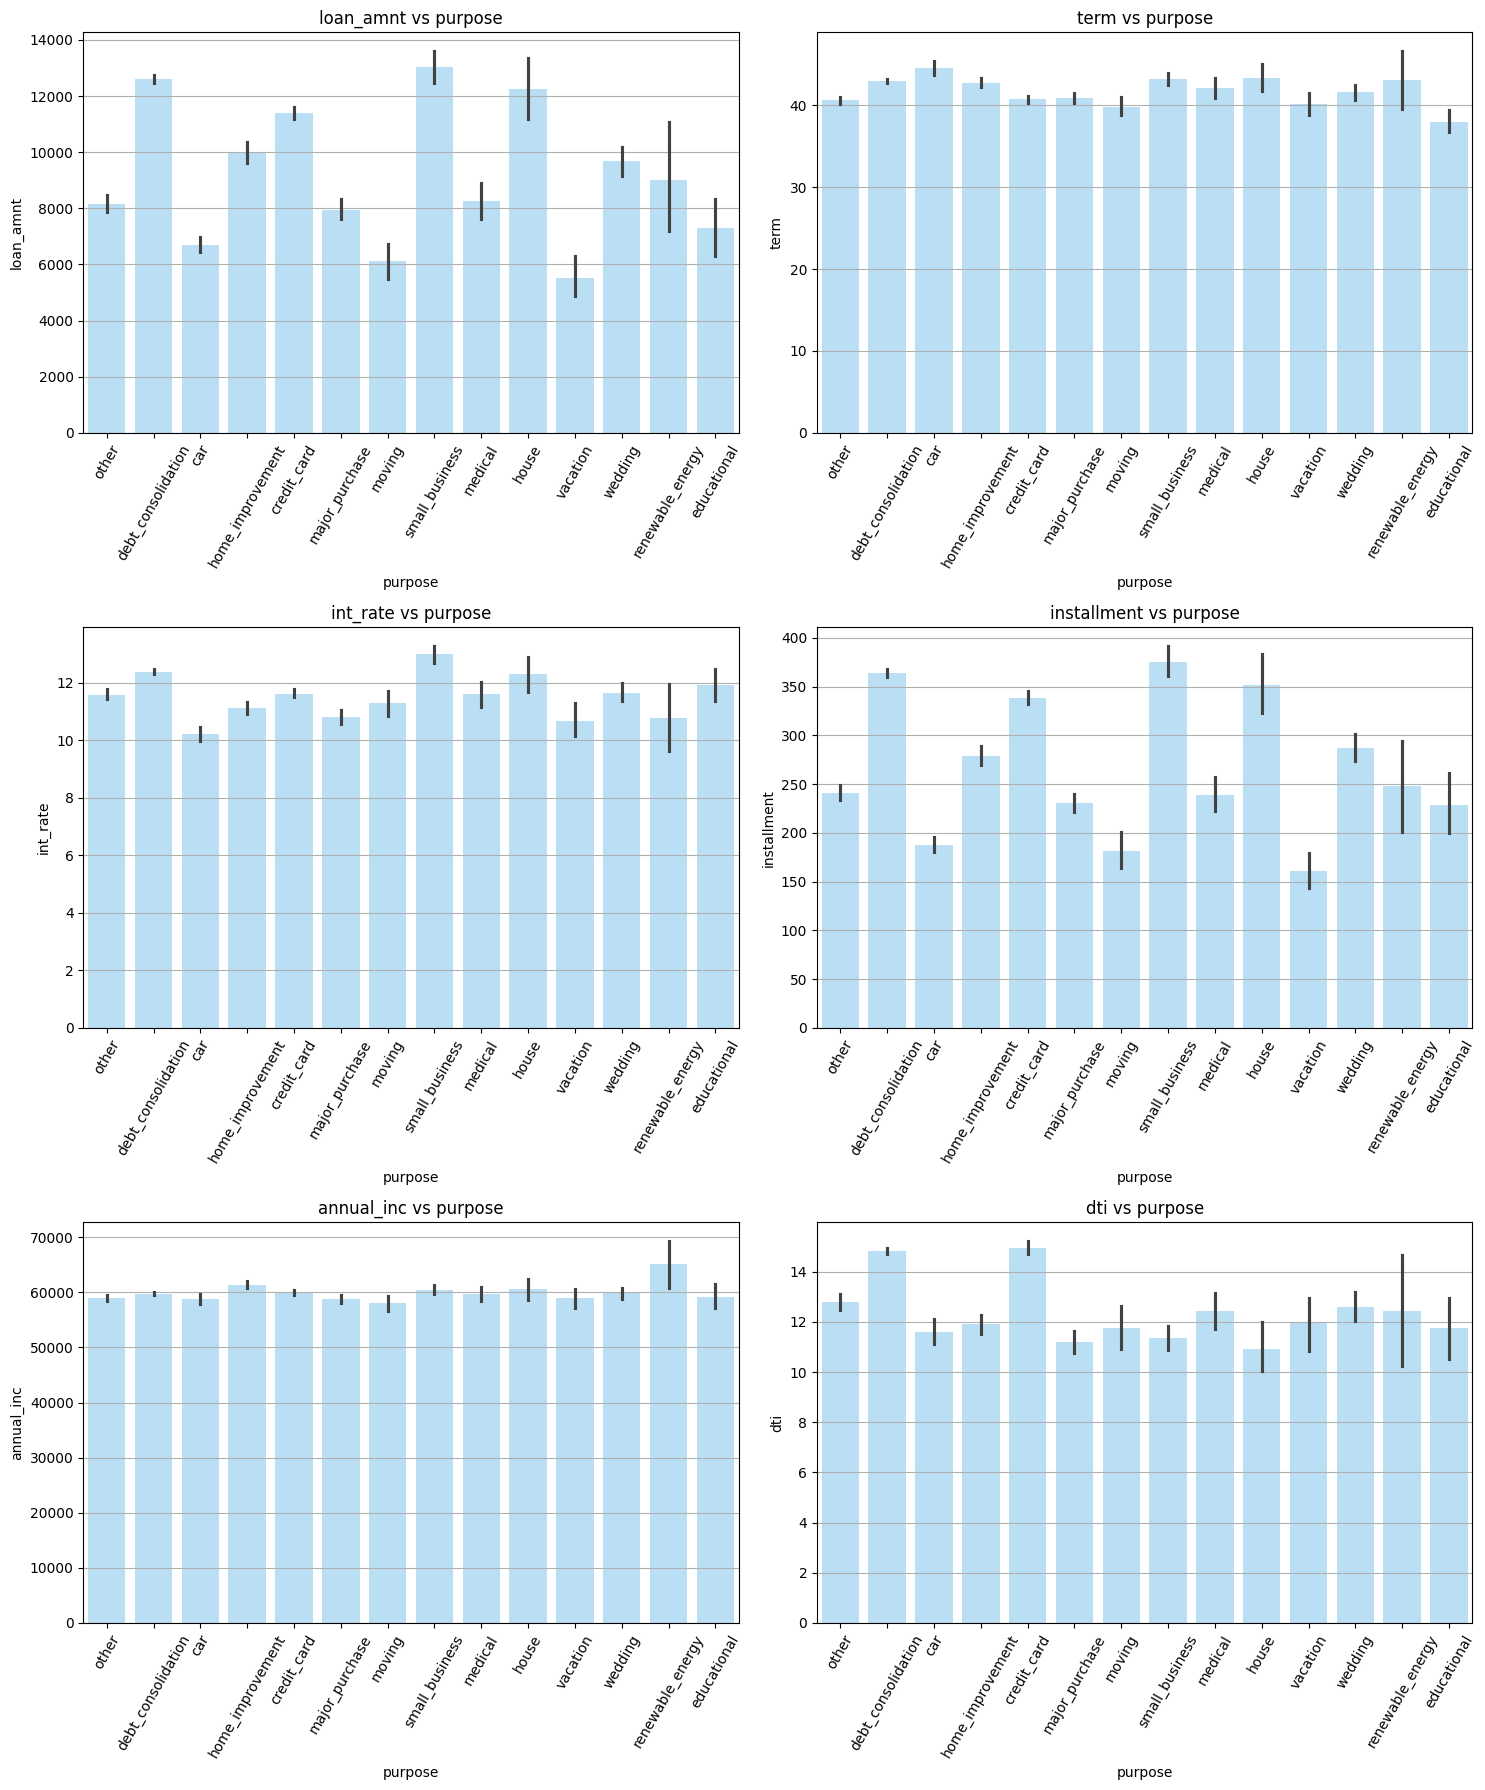

In [60]:
disp_sub_plots('purpose', ['loan_amnt', 'term', 'int_rate', 'installment','annual_inc', 'dti'])

### Bivariate analysis of loan amnt categories vs interest rate, installment, annuall income and dti
`segments for loan amount are`
- Small : <= 12000
- Medium : 12000 > and <= 24000
- Large:  24000 > 

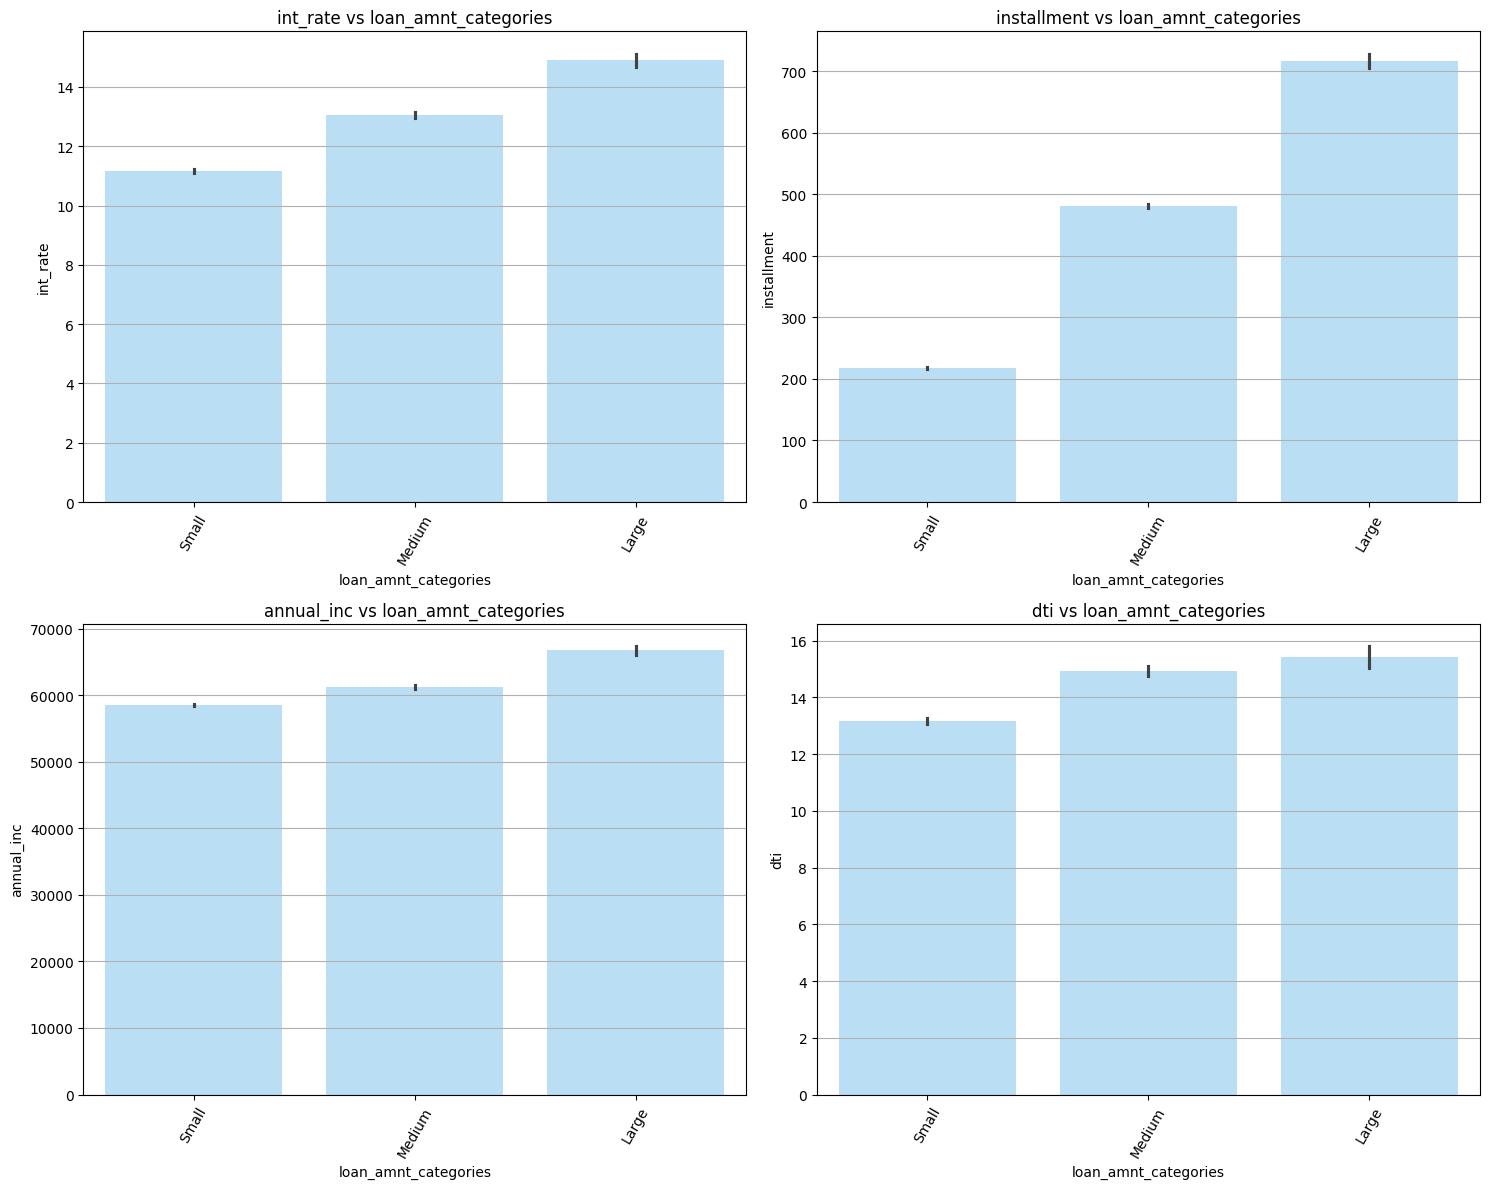

In [61]:
disp_sub_plots('loan_amnt_categories', ['int_rate', 'installment','annual_inc', 'dti'], _order=['Small', 'Medium','Large'])

### Bivariate analysis of installment categories vs interest rate, loan amount, annuall income and dti¶
`segments for installments are`
- Low: <= 200
- Medium <= 800
- High >800

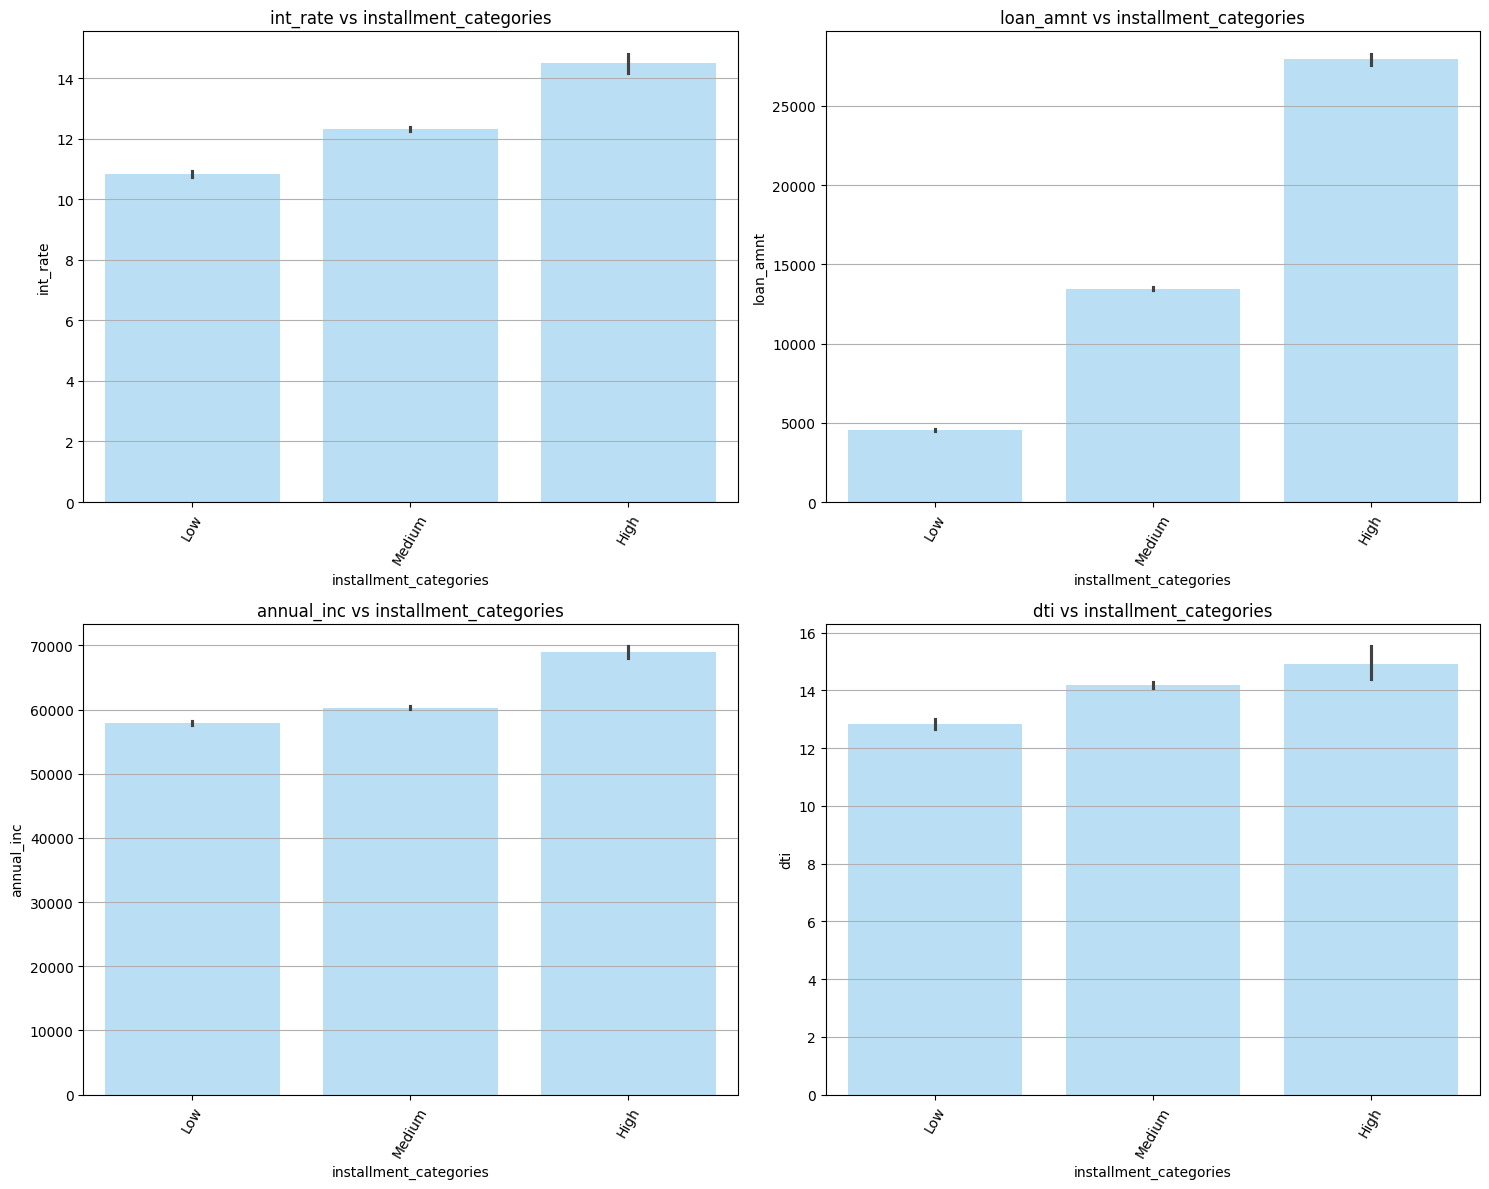

In [62]:
disp_sub_plots('installment_categories', ['int_rate', 'loan_amnt','annual_inc', 'dti'],  _order=['Low', 'Medium','High'])

### Bivariate analysis of installment categories vs interest rate, loan amount, annuall income and dti¶
`segments for annual income are`
- Low: <= 50000
- Medium <= 75000
- High >75000

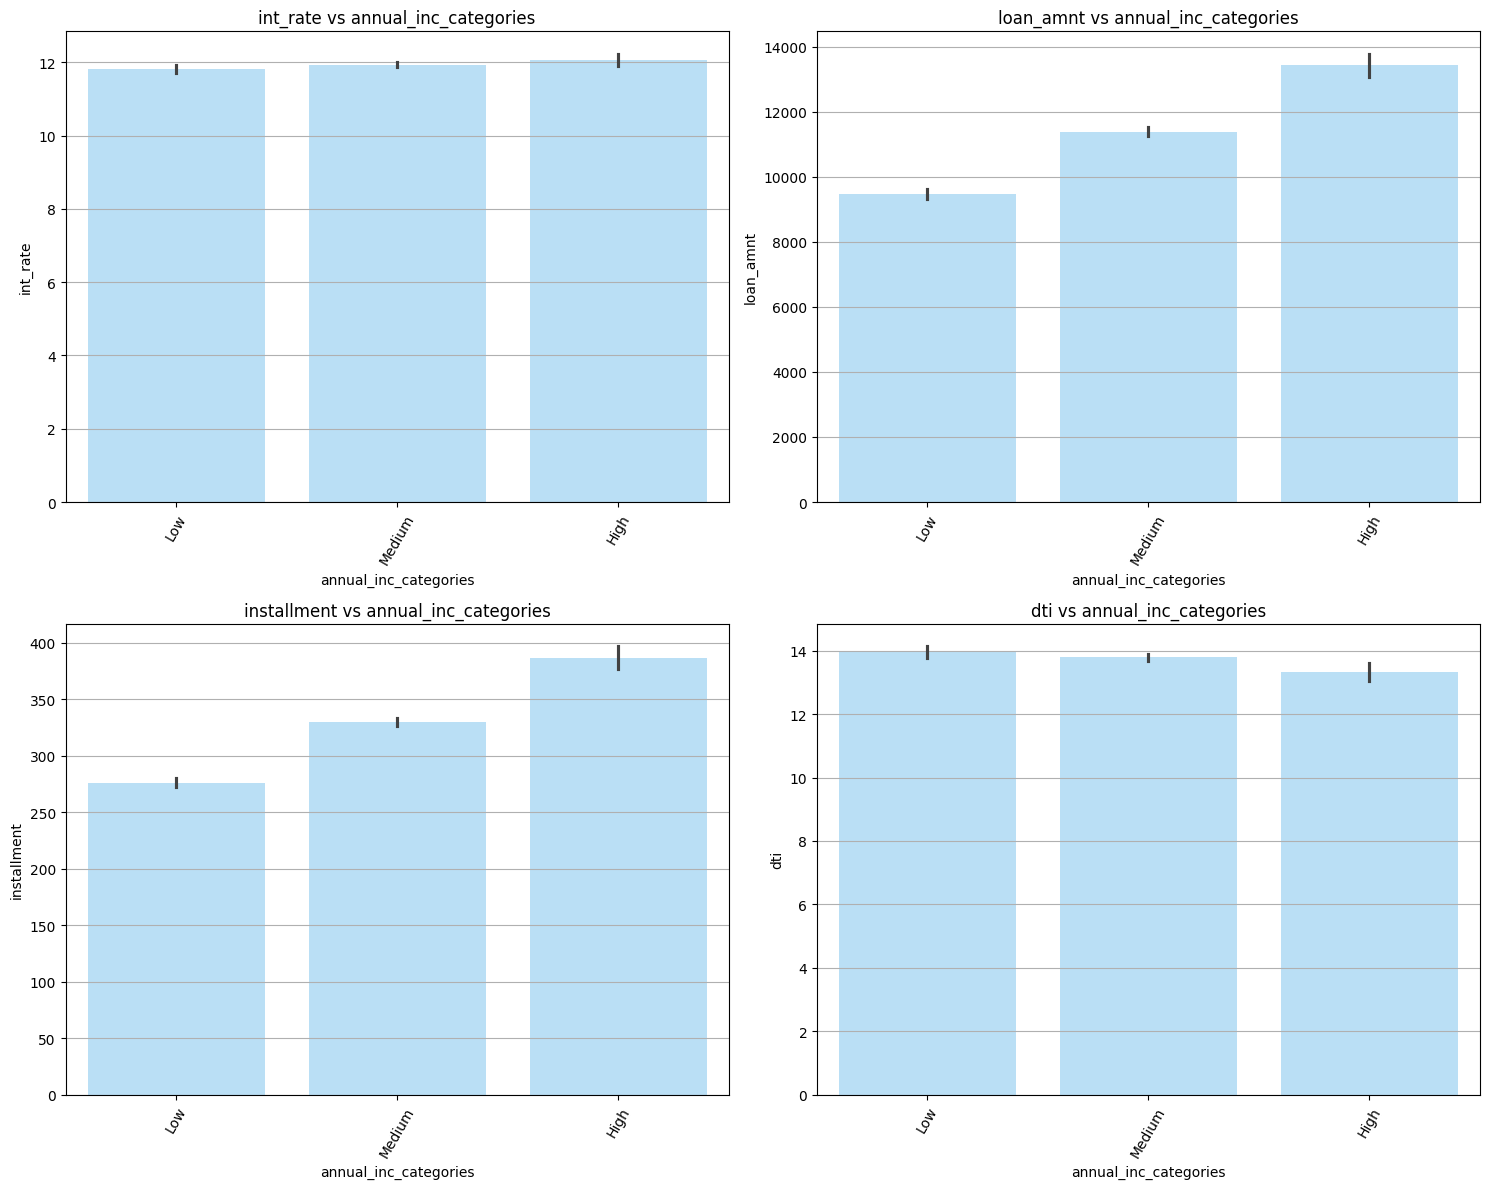

In [63]:
disp_sub_plots('annual_inc_categories', ['int_rate', 'loan_amnt','installment', 'dti'], _order=['Low', 'Medium','High'])

### Bivariate analysis of employment length categories vs interest rate, loan amount, installment and dti
`segments for employment length are`
- Junior: <= 2
- Middle <= 8
- Senior >8

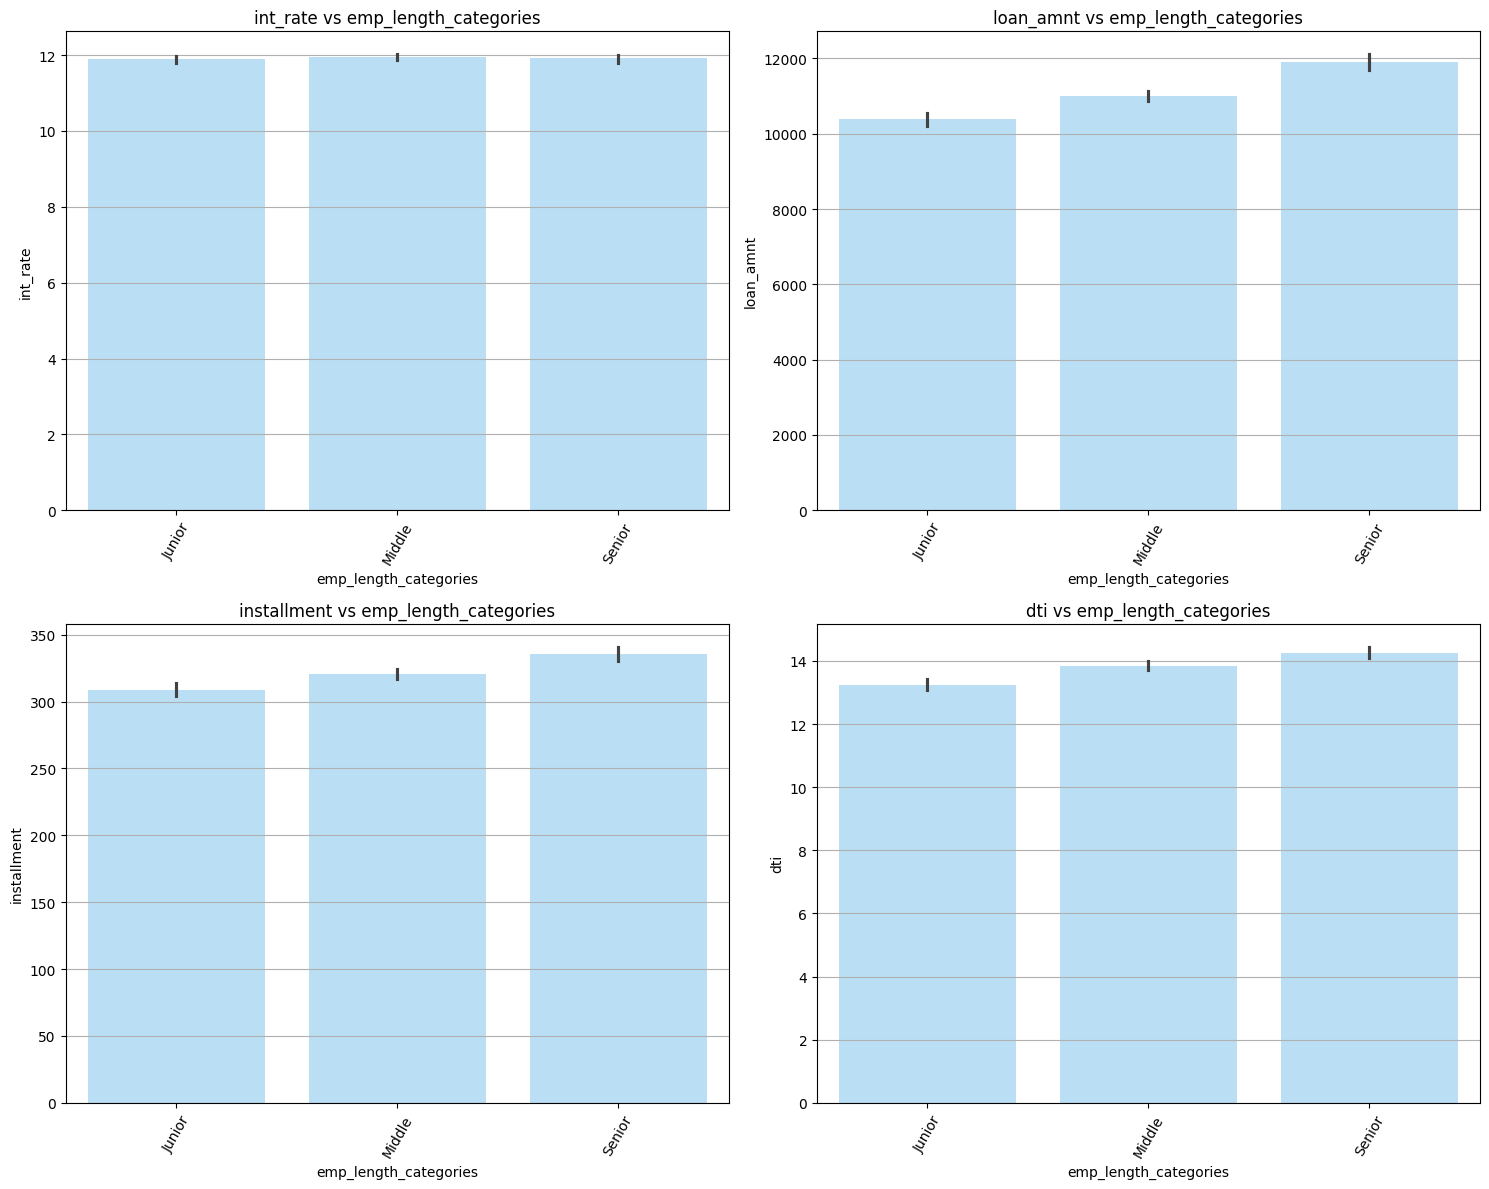

In [64]:
disp_sub_plots('emp_length_categories', ['int_rate', 'loan_amnt','installment', 'dti'], _order=['Junior', 'Middle', 'Senior'])

### Heatmap analysis of numerical field
`loan_status is text field, let's derive a new column. It's values would be Fully Paid: 1, Charged Off: 0`


<Axes: title={'center': 'Heatmap'}>

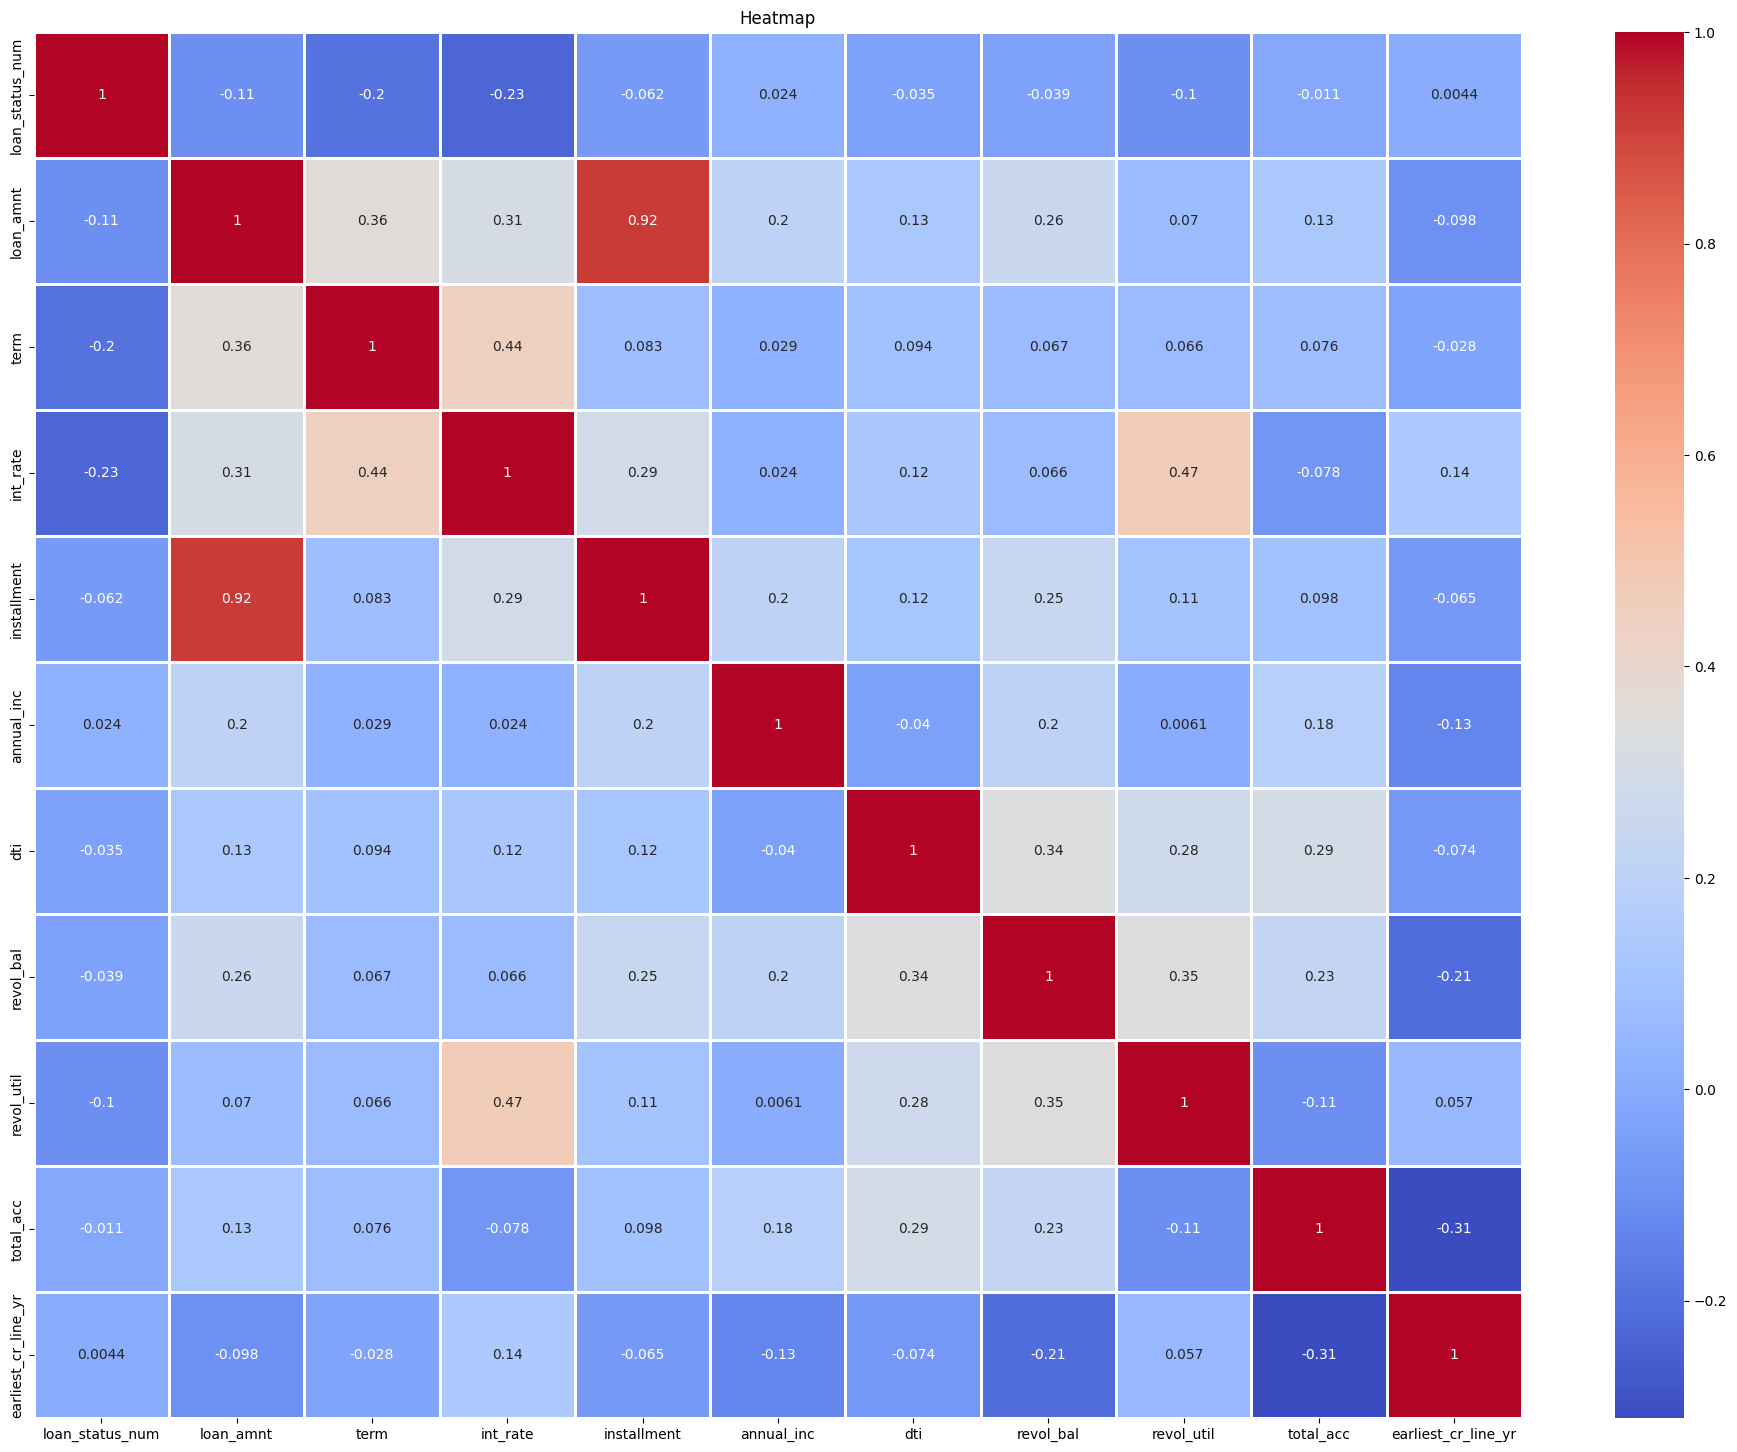

In [65]:
df['loan_status_num'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
## selecting columns for analysis using heatmap
selected_cols = ['loan_status_num','loan_amnt','term','int_rate','installment','annual_inc','dti', 'revol_bal','revol_util','total_acc', 'earliest_cr_line_yr']


plt.figure(figsize=(24, 18))
plt.title('Heatmap')
sns.heatmap(df[selected_cols].corr(), cmap='coolwarm', annot=True, linewidths=1.0)




In [66]:
#Finding defaulters so that further analysis can be done on it

defaulters = df[df['loan_status'] == 'Charged Off']
# Helper function to display barplot based on charged off percentage
def display_pc_charge_off_plot(column, title, xlabel, fig_size=fig_small_size, _order=None):
    defaulter_percent = defaulters.groupby(column, observed=False).size().div(df.groupby(column, observed=False).size()).mul(100)
    plt.figure(figsize=fig_size)
    sns.barplot(x=defaulter_percent.index, y=defaulter_percent.values, color='#BDA0E6', order=_order)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Charged Off %')
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()


## Derived metrics analysis
### Percent of defaluters is considered for default metrics

### Plotting percent of defaulters vs annual income categories

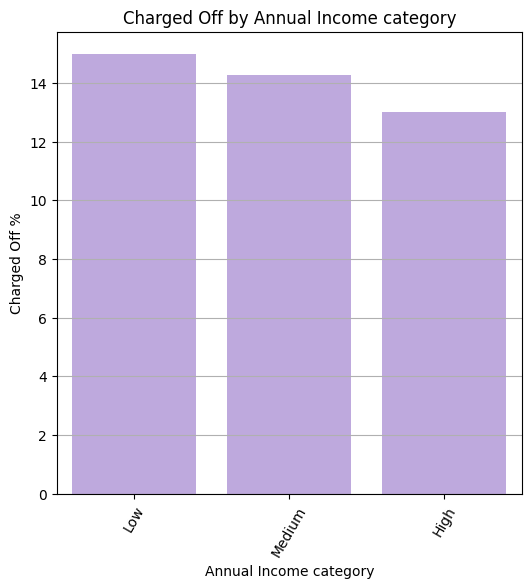

In [67]:
display_pc_charge_off_plot('annual_inc_categories', 'Charged Off by Annual Income category', 'Annual Income category', _order=['Low', 'Medium','High'], fig_size=fig_xsmall_size)

### Plotting percentage of defaulters vs loan amount categories

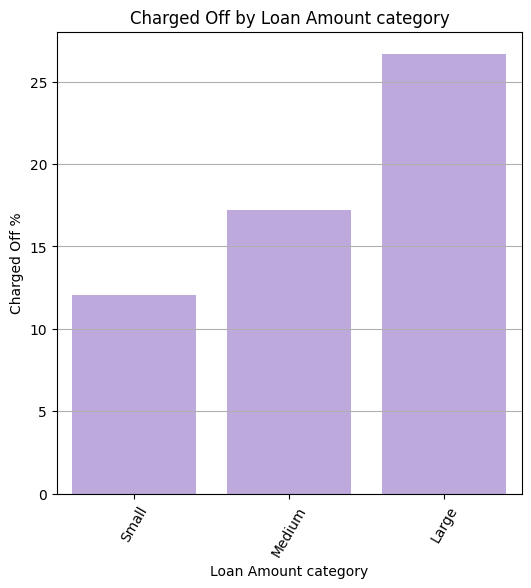

In [68]:
display_pc_charge_off_plot('loan_amnt_categories', 'Charged Off by Loan Amount category', 'Loan Amount category', _order=['Small', 'Medium','Large'], fig_size=fig_xsmall_size)

### Plotting percentage of defaulters vs installment amount categories

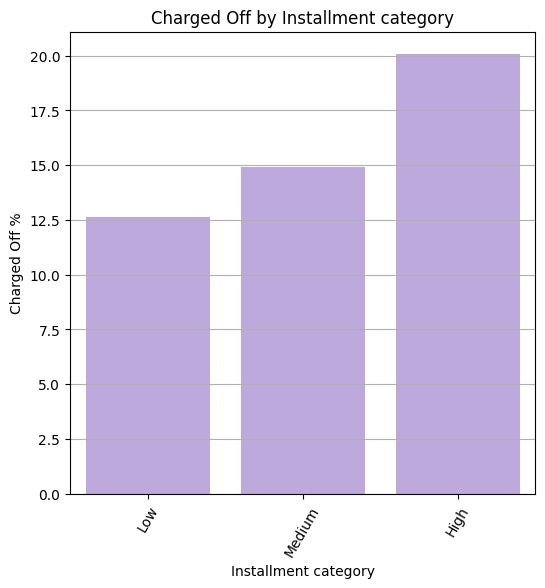

In [69]:
display_pc_charge_off_plot('installment_categories', 'Charged Off by Installment category', 'Installment category', _order=['Low', 'Medium','High'], fig_size=fig_xsmall_size)

### Plotting percentage of defaulters vs terms

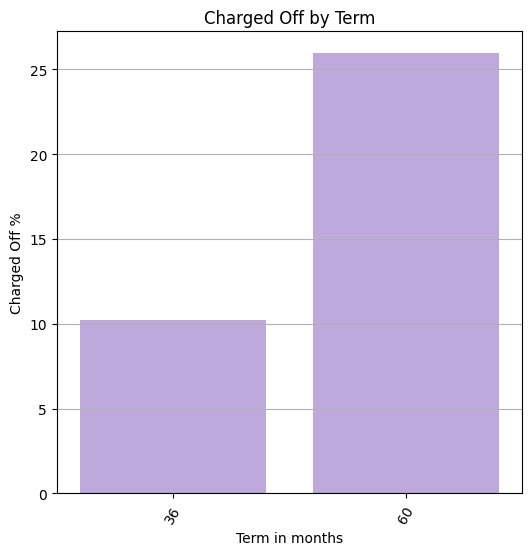

In [70]:
display_pc_charge_off_plot('term', 'Charged Off by Term', 'Term in months', fig_size=fig_xsmall_size)

### Plotting percentage of defaulters vs Grade

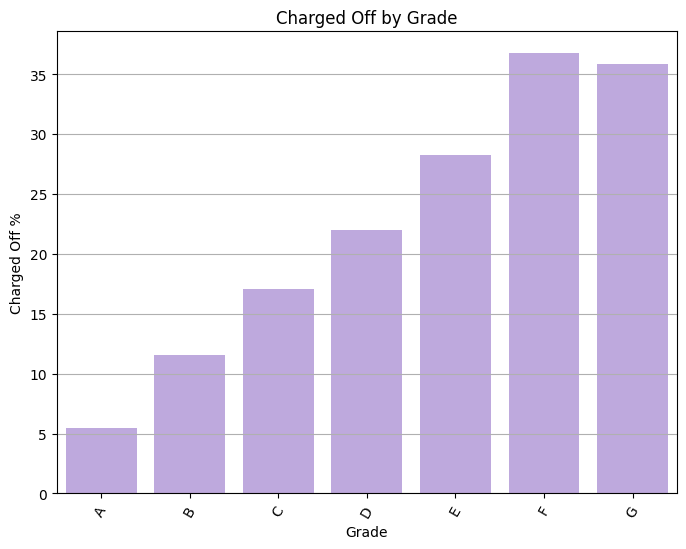

In [71]:
display_pc_charge_off_plot('grade', 'Charged Off by Grade', 'Grade',  _order=sorted(df['grade'].unique()))

### Plotting percentage of defaulters vs subgrades

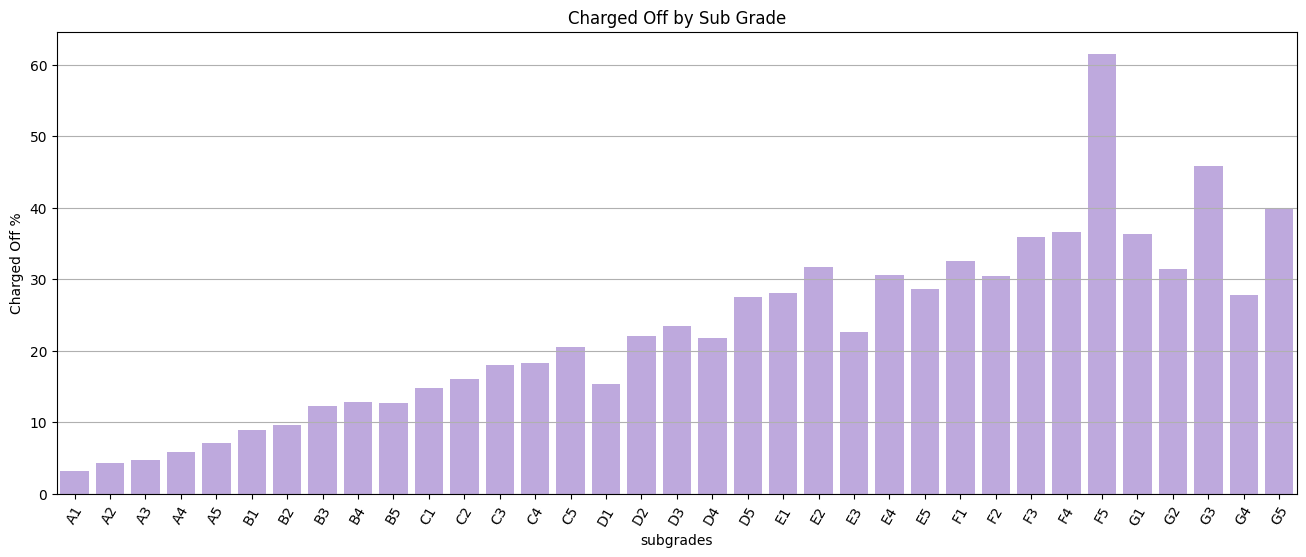

In [72]:
display_pc_charge_off_plot('sub_grade', 'Charged Off by Sub Grade', 'subgrades', fig_size=fig_large_size)

### Plotting percentage of defaulters vs verification status

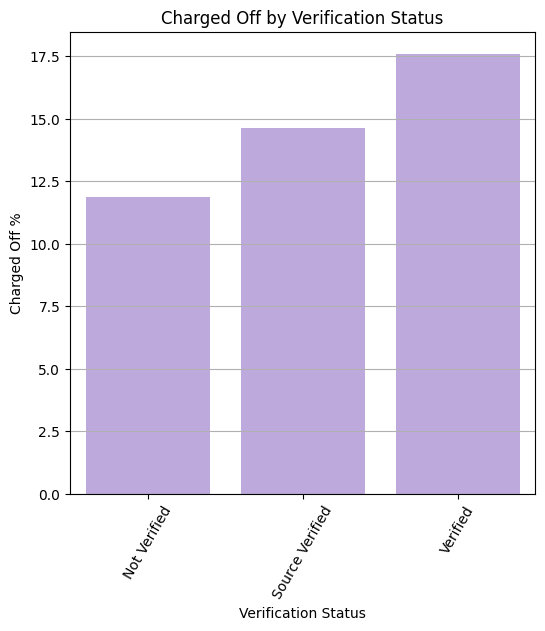

In [73]:
display_pc_charge_off_plot('verification_status', 'Charged Off by Verification Status', 'Verification Status', fig_size=fig_xsmall_size)

### Plotting percentage of defaulters vs purpose of loans

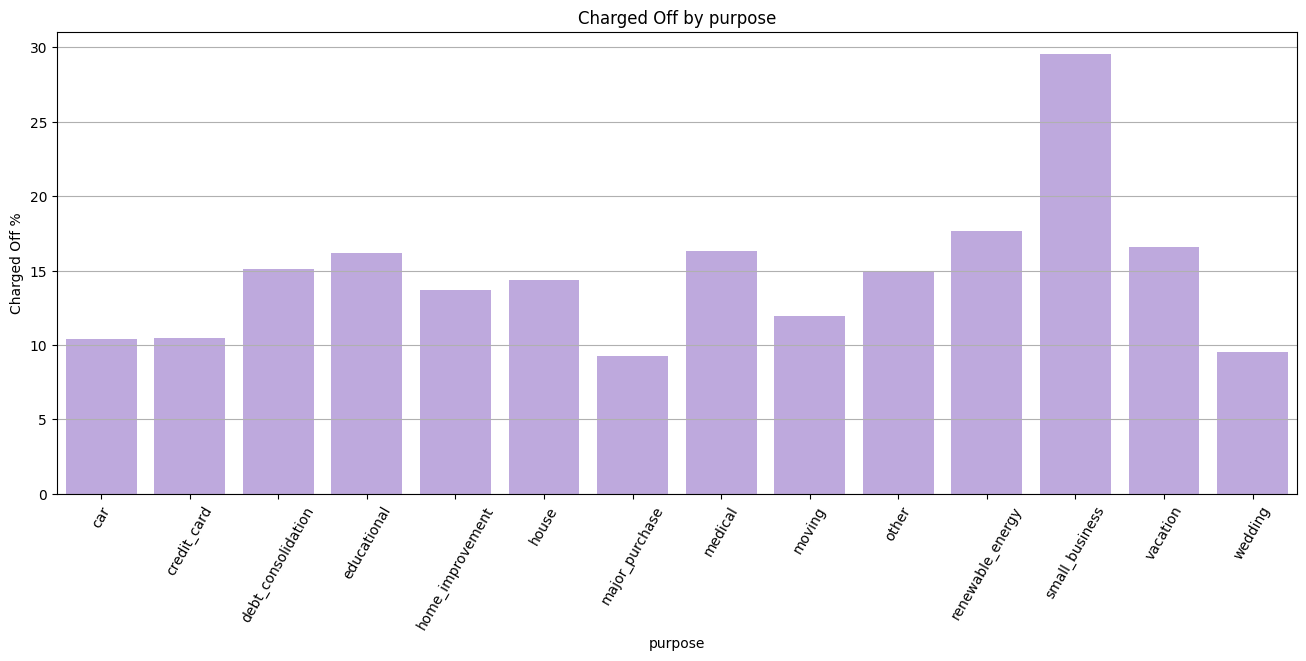

In [74]:
display_pc_charge_off_plot('purpose', 'Charged Off by purpose', 'purpose', fig_size=fig_large_size)

### Plotting percentage of defaulters vs homeownership

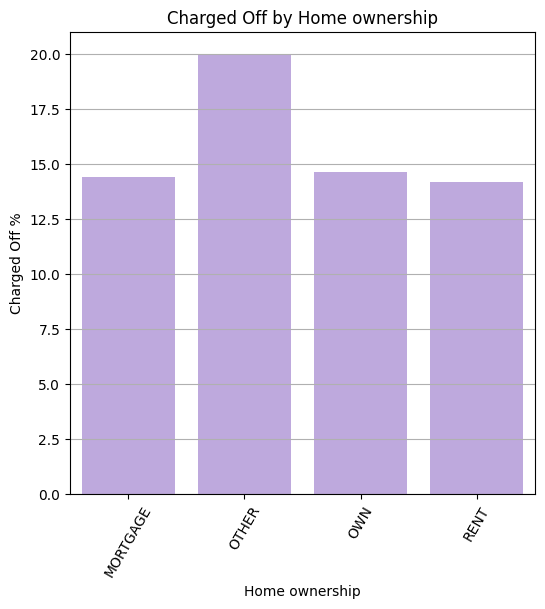

In [75]:
display_pc_charge_off_plot('home_ownership', 'Charged Off by Home ownership', 'Home ownership', fig_size=fig_xsmall_size)

### Plotting percentage of defaulters vs address state

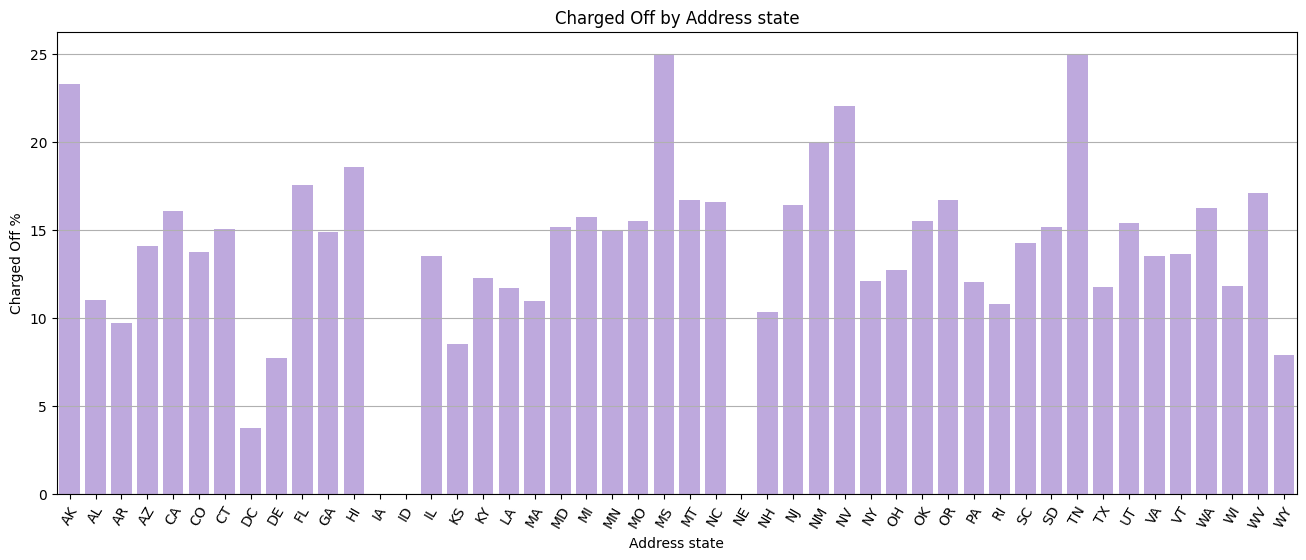

In [76]:
display_pc_charge_off_plot('addr_state', 'Charged Off by Address state', 'Address state', fig_size=fig_large_size)

### Plotting percentage of defaulters vs dti categories

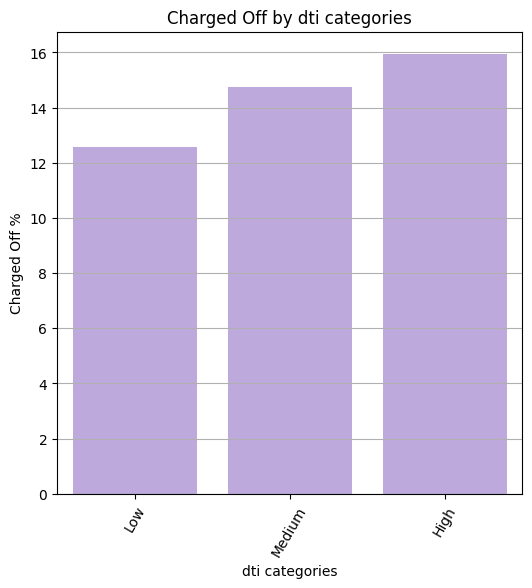

In [77]:
display_pc_charge_off_plot('dti_categories', 'Charged Off by dti categories', 'dti categories', fig_size=fig_xsmall_size, _order=['Low','Medium','High'])

### Plotting percentage of defaulters vs earlist credit line year

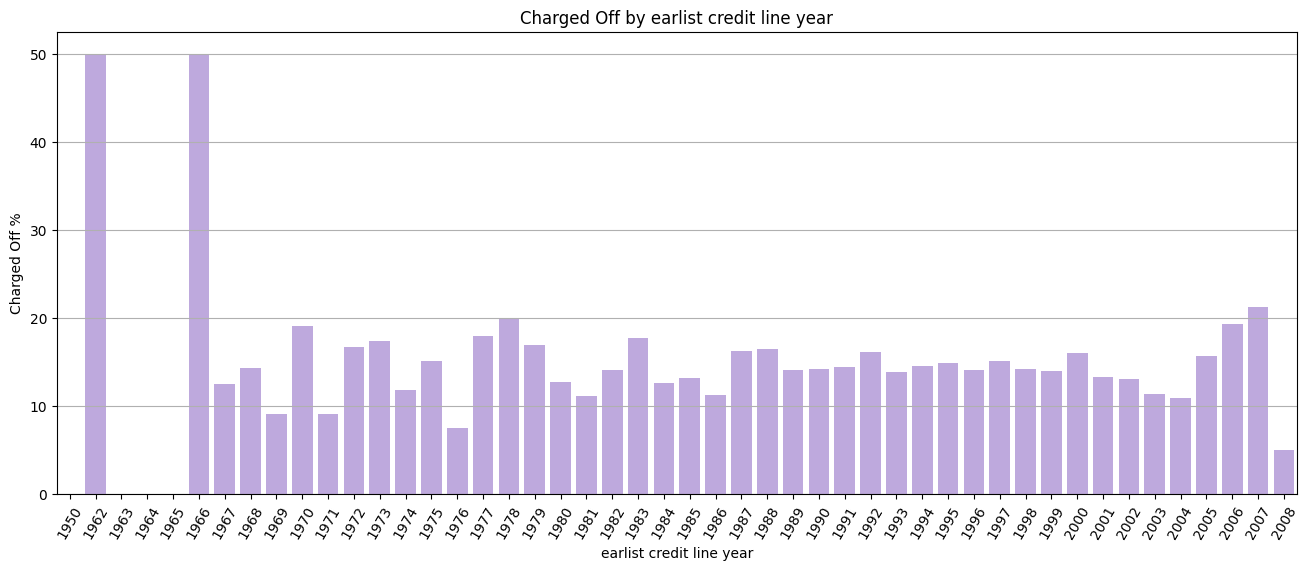

In [78]:
display_pc_charge_off_plot('earliest_cr_line_yr', 'Charged Off by earlist credit line year', 'earlist credit line year', fig_size=fig_large_size,  _order=sorted(df['earliest_cr_line_yr'].unique()))

### Plotting percentage of defaulters vs earliest credit line year categories

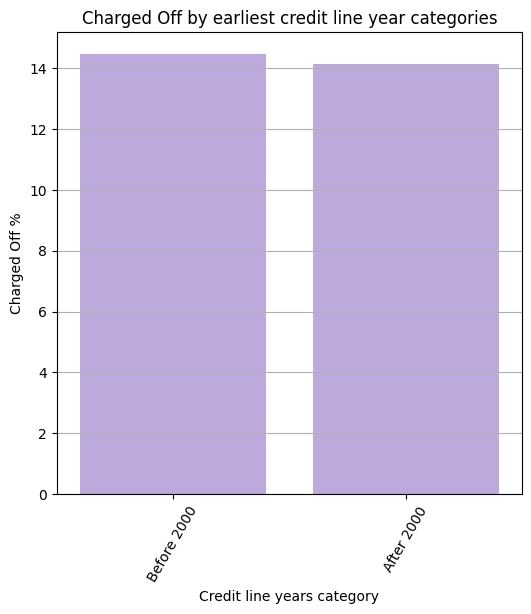

In [79]:
display_pc_charge_off_plot('earliest_cr_line_yr_categories', 'Charged Off by earliest credit line year categories', 'Credit line years category',fig_size=fig_xsmall_size, _order=['Before 2000', 'After 2000'])

### Plotting percentage of defaulters vs Open Account

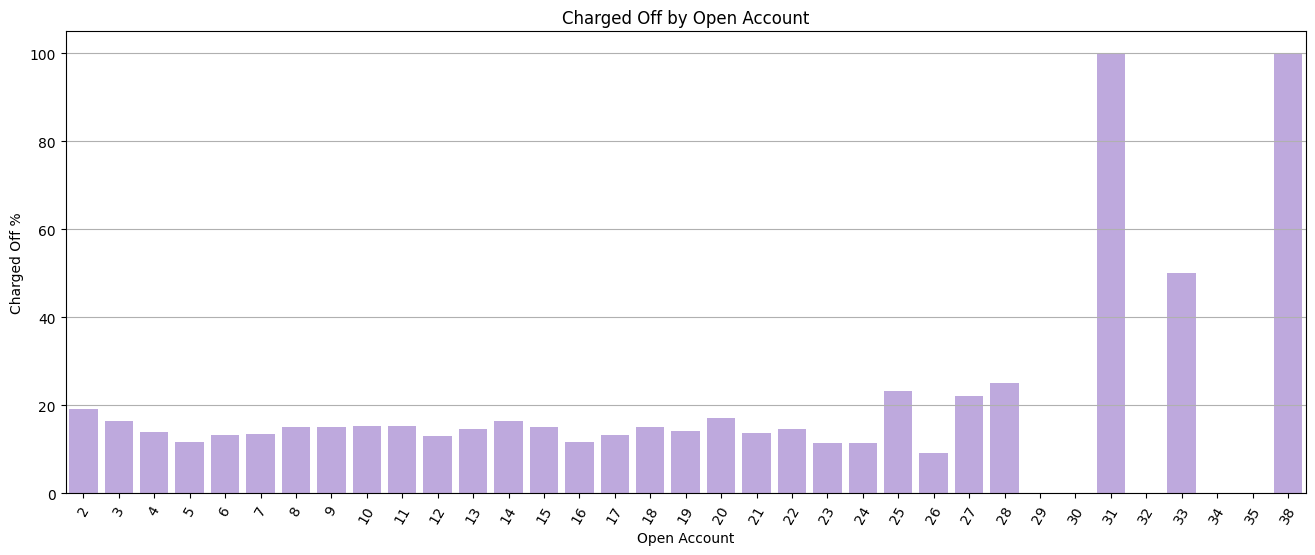

In [80]:
display_pc_charge_off_plot('open_acc', 'Charged Off by Open Account', 'Open Account', fig_size=fig_large_size)

### Plotting percentage of defaulters vs Employment length

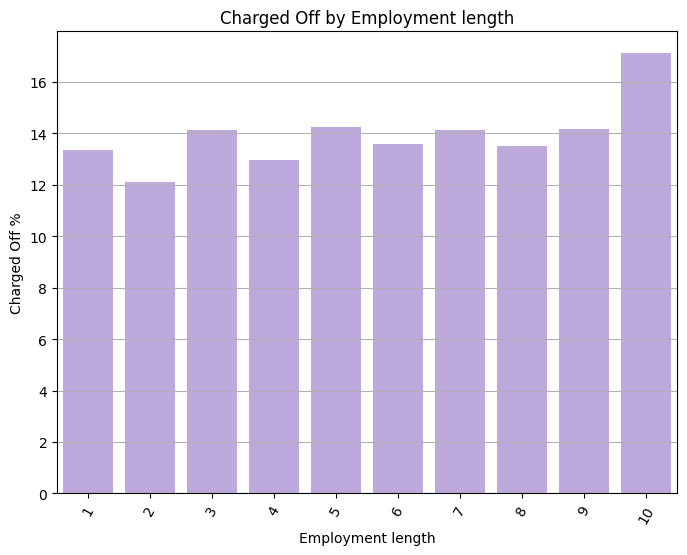

In [81]:
display_pc_charge_off_plot('emp_length', 'Charged Off by Employment length', 'Employment length')

### Plotting percentage of defaulters vs Employment length categories

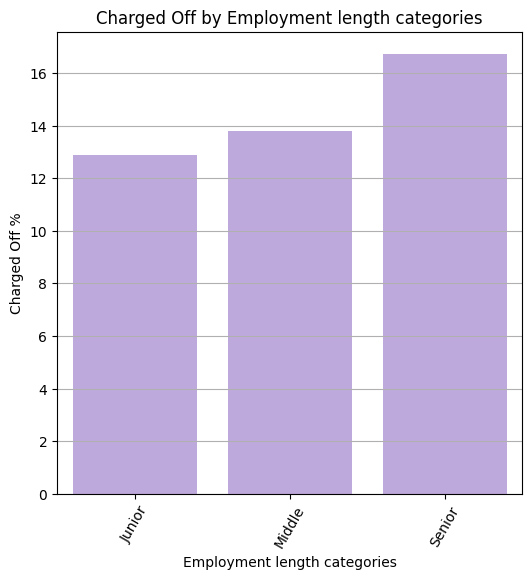

In [82]:
display_pc_charge_off_plot('emp_length_categories', 'Charged Off by Employment length categories', 'Employment length categories', fig_size=fig_xsmall_size, _order=['Junior', 'Middle', 'Senior'])